# Goals of the project:

The goal of this project is to explore data pertaining to properties in Boston and to predict the value of these properties based on their characteristics in the data or from external sources.

Data was acquired from the City of Boston and other government sources where applicable.

I'd love to hear any feedback or answer questions and can be reached at jordan@jordanbean.com!

In [1]:
# Read in libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime

from IPython.display import display
pd.options.display.max_columns = None

In [2]:
## Read in the data

property_2018 = pd.read_csv(r'C:\Users\jbean\Dropbox\Other\Python\Boston Data\ast2018full.csv', low_memory=False)
neighborhood_zip = pd.read_excel(r'C:\Users\jbean\Dropbox\Other\Python\Boston Data\boston-office-by-zipcode.xls')

# Initial data exploration

In [3]:
## Show a sample of the property data

property_2018.sample(10)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,OWN_OCC,OWNER,MAIL_ADDRESSEE,MAIL_ADDRESS,MAIL CS,MAIL_ZIPCODE,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,STRUCTURE_CLASS,R_BLDG_STYL,R_ROOF_TYP,R_EXT_FIN,R_TOTAL_RMS,R_BDRMS,R_FULL_BTH,R_HALF_BTH,R_BTH_STYLE,R_BTH_STYLE2,R_BTH_STYLE3,R_KITCH,R_KITCH_STYLE,R_KITCH_STYLE2,R_KITCH_STYLE3,R_HEAT_TYP,R_AC,R_FPLACE,R_EXT_CND,R_OVRALL_CND,R_INT_CND,R_INT_FIN,R_VIEW,S_NUM_BLDG,S_BLDG_STYL,S_UNIT_RES,S_UNIT_COM,S_UNIT_RC,S_EXT_FIN,S_EXT_CND,U_BASE_FLOOR,U_NUM_PARK,U_CORNER,U_ORIENT,U_TOT_RMS,U_BDRMS,U_FULL_BTH,U_HALF_BTH,U_BTH_STYLE,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
148468,2006296000,NaN,2.006296e+09,22,GARTH,RD,NaN,2132.0,101,R1,Y,PENO PATRICIA A,,22 GARTH RD,WEST ROXBURY MA,02132,126400,316600,443000,464264,3495.0,1920.0,0.0,2486.0,1588.0,2.0,R,CL,L,S,8.0,4.0,1.0,0.0,S,NaN,NaN,1.0,S,NaN,NaN,W,N,0.0,G,A,A,N,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117751,1801182000,NaN,1.801182e+09,610,RIVER,ST,NaN,2126.0,101,R1,Y,HOLLAND TIMOTHY D,,610 RIVER ST,MATTAPAN MA,02126,126800,225000,351800,368687,3621.0,1910.0,1994.0,1988.0,1228.0,2.0,R,CL,H,M,6.0,3.0,1.0,1.0,M,M,NaN,1.0,M,NaN,NaN,F,N,0.0,A,A,A,N,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86867,1200719002,1.200719e+09,1.200719e+09,86,WALNUT,AV,NaN,2119.0,908,E,N,BOSTON HOUSING AUTHORITY,,86 WALNUT AV #1,ROXBURY MA,02119,0,193800,193800,0,1041.0,1987.0,0.0,1041.0,1041.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,N,T,5,2.0,1.0,0,S,NaN,NaN,O,S,W,N,0.0,N,A,A
47982,503255008,5.032550e+08,5.032550e+08,226,COMMONWEALTH,AV,3,2116.0,102,CD,Y,ARCHIBALD PAUL,C/O BENJAMIN D TIPPING,226 COMMONWEALTH AV #3,BOSTON MA,02116,0,1158300,1158300,1213899,1334.0,1880.0,2011.0,1334.0,1334.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,N,T,5,3.0,2.0,0,S,M,NaN,O,M,W,N,2.0,N,A,A
165222,2200101001,NaN,2.200101e+09,52,CAMBRIDGE,ST,NaN,2134.0,317,C,N,PHILIP A HOUGHTON INC,C/O HOUGHTON CHEMICAL CORP,52 CAMBBRIDGE BX 307,ALLSTON MA,02134,870400,321100,1191500,3002580,44710.0,1922.0,1980.0,3780.0,3780.0,1.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82996,1102080000,NaN,1.102080e+09,16,HAVERFORD,ST,NaN,2130.0,105,R3,N,HARRIS CHARLES F,,16 HAVERFORD ST,JAMAICA PLAIN MA,02130,151800,622800,774600,811781,2400.0,1910.0,0.0,5200.0,3727.0,3.0,R,DK,G,F,17.0,9.0,3.0,0.0,S,S,S,3.0,S,S,S,F,N,1.0,A,A,G,N,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137601,1903071000,NaN,1.903071e+09,44,CUMMINS,HW,NaN,2131.0,101,R1,Y,MURPHY WILLIAM J TS,,44 CUMMINS HWY,ROSLINDALE MA,02131,104800,255800,360600,377909,2071.0,1905.0,1990.0,2016.0,1280.0,2.0,R,CL,G,M,6.0,3.0,1.0,0.0,S,NaN,NaN,1.0,S,NaN,NaN,W,N,0.0,A,A,A,N,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9046,200246000,NaN,2.002460e+08,50,ELM,ST,NaN,2129.0,101,R1,Y,HOWELL MARY E,,50 ELM,CHARLESTOWN MA,02129,288300,503500,791800,829807,2150.0,1880.0,0.0,2619.0,1837.0,3.0,R,SD,F,M,6.0,4.0,1.0,1.0,N,N,NaN,1.0,N,NaN,NaN,W,N,0.0,F,A,A,N,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130927,1812267007,NaN,1.812267e+09,9,JOAN,RD,NaN,2136.0,101,R1,Y,ANDERSON MARY E,,9 JOAN RD,HYDE PARK MA,02136,107600,182300,289900,303816,5770.0,1950.0,0.0,2396.0,1781.0,1.0,R,RR,G,M,7.0,3.0,1.0,1.0,S,S,NaN,1.0,S,NaN,NaN,F,N,0.0,A,A,A,N,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
## Show a sample of the neighborhood data that will be used for matching

neighborhood_zip.head()

,Zip Code,Neighborhood/Municipality
0,2108,Beacon Hill
1,2109,Faneuil Hall / North End
2,2110,Downtown Crossing / Fin. District
3,2111,Chinatown / Tufts Medical
4,2113,North End


# Data cleaning

In [5]:
# Start by dropping columns that we don't care about in the property dataset

cols_to_drop_property = ['CM_ID','GIS_ID','MAIL_ADDRESSEE','MAIL CS','R_ROOF_TYP','R_KITCH',
                         'R_HEAT_TYP','R_AC','R_FPLACE','U_HEAT_TYP','U_AC','U_FPLACE']

property_2018 = property_2018.drop(cols_to_drop_property, axis=1)

In [6]:
## Add a luxury variable based on kitchen/bathroom finish

luxury = []

luxury_cols = ['R_BTH_STYLE','R_BTH_STYLE2','R_BTH_STYLE3','R_KITCH_STYLE','R_KITCH_STYLE2','R_KITCH_STYLE3',
              'U_BTH_STYLE','U_BTH_STYLE2','U_BTH_STYLE3','U_KITCH_TYPE','U_KITCH_STYLE']

lux = property_2018[luxury_cols]

for i, val in lux.iterrows():
    
    joined = ''.join(str(lux.iloc[i].values))
    
    if joined == 'NaN':
        
        luxury.append(0)
    
    elif 'L' in joined:
        
        luxury.append(1)
            
    else:
        luxury.append(0)

In [7]:
## Add the newly created luxury variable

property_2018['luxury'] = luxury

In [8]:
# Add the neighborhood variable by matching zip codes

property_2018 = pd.merge(property_2018, neighborhood_zip, left_on = 'ZIPCODE', 
                        right_on = 'Zip Code', how='left', validate='m:m')

In [9]:
## Drop the added zip code column and rename the new column

property_2018.drop('Zip Code', axis=1, inplace=True)
property_2018.rename(columns={'Neighborhood/Municipality':'Neighborhood'}, inplace=True)

In [10]:
## Examine the distribution of neighborhood to ensure it makes sense and matched correctly

property_2018.Neighborhood.value_counts()

South Boston                         13854
Jamaica Plain                        11583
Brighton                             11509
West Roxbury                         10917
Dorchester Center                    10915
Back Bay                              9366
Hyde Park                             9218
Roslindale                            8939
South End                             8578
East Boston                           8513
Dorchester Uphams Corner              7506
Charlestown                           7137
Roxbury                               6050
Dorchester                            6028
Back Bay / Fenway                     5140
Mattapan                              4919
West End                              4900
Allston                               4420
Dorchester Grove Hall                 4272
Kenmore                               3579
Chinatown / Tufts Medical             2858
North End                             2282
Downtown Crossing / Fin. District     2151
Beacon Hill

In [11]:
# Filter for only residential properties

res_property_codes = ['A','CD','R1','R2','R3','R4','RC','RL']

property_2018_res = property_2018.copy()
property_2018_res = property_2018_res[property_2018_res.LU.isin(res_property_codes)]

In [12]:
## Print the length of the new data set relative to the old one

print("The length of the full data set is %i properties" %len(property_2018))
print("The length of the residential only data set is %i properties" %len(property_2018_res))

The length of the full data set is 172841 properties
The length of the residential only data set is 139664 properties


In [13]:
## Look at a sampling of the residential-only data

property_2018_res.sample(5)

,PID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,OWN_OCC,OWNER,MAIL_ADDRESS,MAIL_ZIPCODE,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,STRUCTURE_CLASS,R_BLDG_STYL,R_EXT_FIN,R_TOTAL_RMS,R_BDRMS,R_FULL_BTH,R_HALF_BTH,R_BTH_STYLE,R_BTH_STYLE2,R_BTH_STYLE3,R_KITCH_STYLE,R_KITCH_STYLE2,R_KITCH_STYLE3,R_EXT_CND,R_OVRALL_CND,R_INT_CND,R_INT_FIN,R_VIEW,S_NUM_BLDG,S_BLDG_STYL,S_UNIT_RES,S_UNIT_COM,S_UNIT_RC,S_EXT_FIN,S_EXT_CND,U_BASE_FLOOR,U_NUM_PARK,U_CORNER,U_ORIENT,U_TOT_RMS,U_BDRMS,U_FULL_BTH,U_HALF_BTH,U_BTH_STYLE,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_INT_FIN,U_INT_CND,U_VIEW,luxury,Neighborhood
22377,303061052,234,CAUSEWAY,ST,716,2114.0,102,CD,Y,RETTMAN BRIAN J,234 CAUSEWAY ST #716,02114,0,716600,716600,750997,1052.0,1899.0,2002.0,1052.0,1052.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0,N,F,4,1.0,1.0,0,M,NaN,NaN,O,M,N,G,A,0,West End
75090,900920010,543,MASSACHUSETTS,AV,5,2118.0,102,CD,Y,GEER MITCHELL L,543 MASSACHUSETTS AV #5,02118,0,449800,449800,471391,859.0,1920.0,1985.0,859.0,827.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,N,T,4,2.0,1.0,0,S,NaN,NaN,O,N,N,F,F,0,South End
48689,503408008,11,GLOUCESTER,ST,4,2115.0,102,CD,Y,GOSSELIN JOHN T,206 SCHOOL ST,02478,0,1108000,1108000,1161184,1200.0,1890.0,2013.0,1200.0,1200.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,N,T,4,2.0,1.0,0,M,NaN,NaN,O,M,N,G,G,0,Back Bay / Fenway
51778,503916568,464,COMMONWEALTH,AV,55,2215.0,102,CD,Y,GLUMAKOV ALEXANDER,464 COMMONWEALTH AV #55,02215,0,605900,605900,634984,982.0,1910.0,1982.0,982.0,982.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,N,F,4,1.0,1.0,1,S,S,NaN,O,S,N,A,A,0,Kenmore
94224,1400367023,116,DEVON,ST,NaN,2121.0,125,A,N,Q-G II HOUSING,6 FANEUIL HALL MRKTPLC,02109,171180,297428,468608,491101,2160.0,1890.0,1990.0,4971.0,3730.0,3.0,R,RM,B,17.0,8.0,3.0,0.0,S,S,S,M,M,M,G,A,A,N,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dorchester Grove Hall


We now have a data set that contains all of the residential properties in Boston. We'll use this to do some initial exploratory data analysis before moving into the machine learning part of the code.

# Exploratory Data Analysis

# Distribution of properties by year built

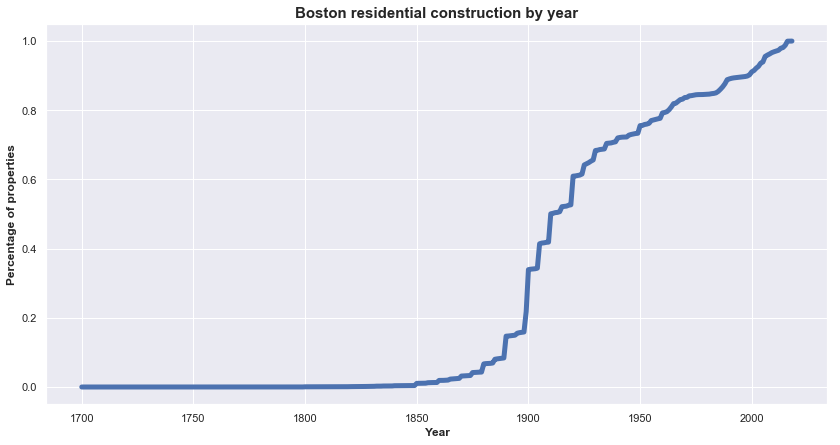

In [14]:
## Distribution of when houses were built

cumu_sum_yr = np.cumsum(property_2018_res[property_2018_res.YR_BUILT > 0]['YR_BUILT'].value_counts().sort_index() \
                        .divide(len(property_2018_res[property_2018_res.YR_BUILT > 0])))

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(cumu_sum_yr, linewidth=5)
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Percentage of properties', fontweight='bold')
ax.set_title('Boston residential construction by year', fontsize=15, fontweight='bold')

plt.show()

After filtering out some outliers, we can look at how the city was developed by year with regard to the properties that are still existing today. Some interesting notes are that the city was more than 75% built up by 1950, and the drmatic increase at the turn of the 20th century. Between just before 1900 and ~1925, the percentage of buildings jumped from less than 20% to more than 60%.

In [15]:
## Define a function that will calculate the cumulative distribution of property values by neighborhood

def cum_sum_plot(neighborhood, df=property_2018_res):

    df = df[df.Neighborhood == neighborhood]
    
    cumu_sum_yr = np.cumsum(df[df.YR_BUILT > 0]['YR_BUILT'].value_counts().sort_index() \
                        .divide(len(df[df.YR_BUILT > 0])))
    
    return cumu_sum_yr

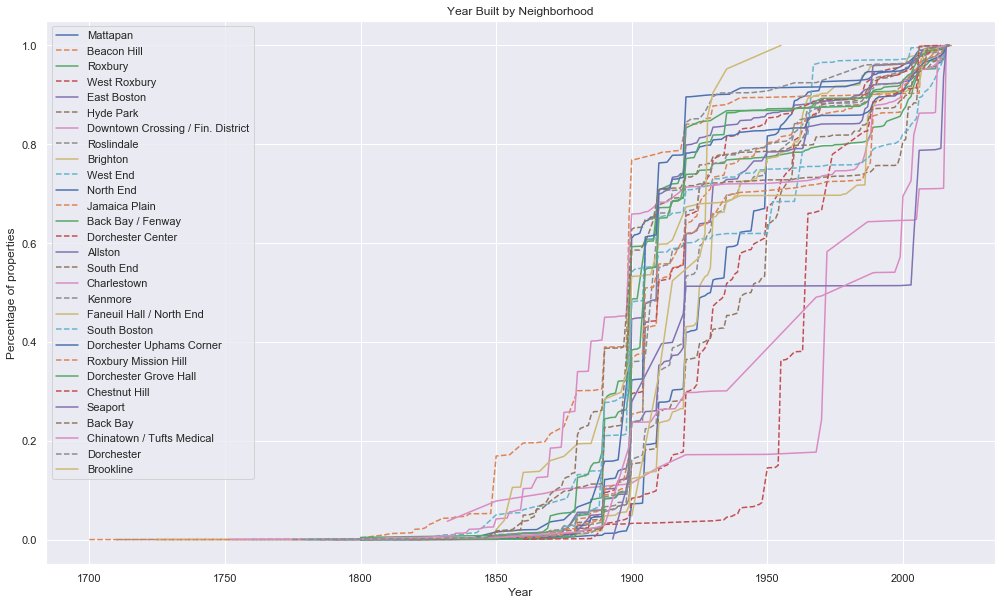

In [16]:
## Plot the development of properties by neighborhood

plt.figure(figsize=(17, 10))
plt.title('Year Built by Neighborhood')
plt.xlabel('Year')
plt.ylabel('Percentage of properties')

for i, neigh in enumerate(list(set(property_2018_res.Neighborhood))):
    
    if isinstance(neigh, str):
        
        if i % 2 == 0:
            
            plt.plot(cum_sum_plot(neigh), label=neigh, linestyle='dashed')
        
        else:
            plt.plot(cum_sum_plot(neigh), label=neigh)
    
plt.legend(loc='upper left')
plt.show()

We see an interesting distribution of property by neighborhood. For example, an area like the seaport was less than 60% developed by 2000. We'll make the plot a little bit less cluttered by pulling out only a few neighborhoods and looking at their relative distributions.

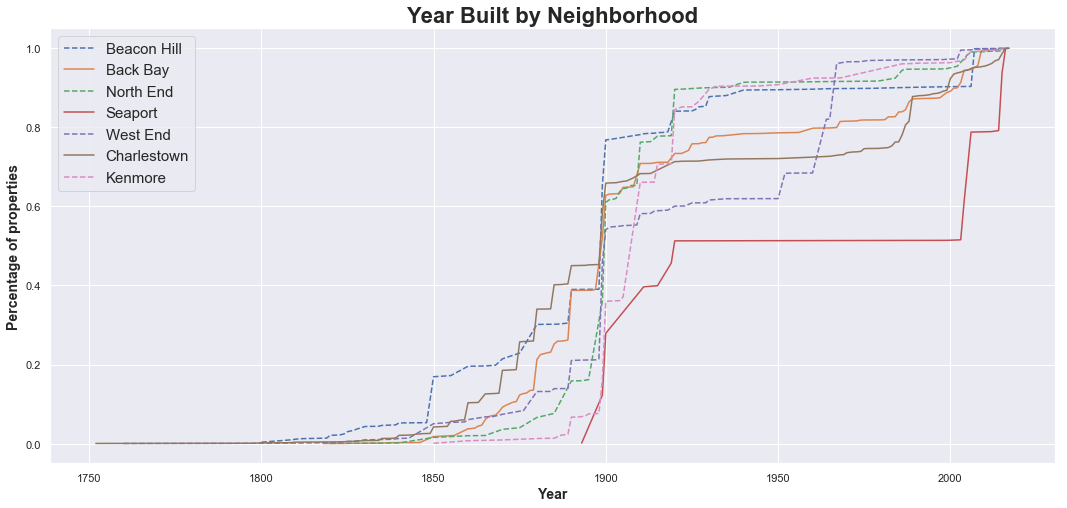

In [17]:
# Condense the neighborhoods in the plot

neighs_to_plot = ['Beacon Hill','Back Bay','North End','Seaport','West End','Charlestown','Kenmore']

plt.figure(figsize=(18, 8))
plt.title('Year Built by Neighborhood', fontweight='bold', fontsize=22)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Percentage of properties', fontweight='bold', fontsize=14)

for i, neigh in enumerate(neighs_to_plot):
    
    if i % 2 == 0:
        plt.plot(cum_sum_plot(neigh), label=neigh, linestyle='dashed')
        
    else:
        plt.plot(cum_sum_plot(neigh), label=neigh)
    
    
plt.legend(loc='upper left', prop={'size':15})
plt.show()

Here we see with a bit more clarity how some of the neighborhoods progressed. For example, nothing was built in the Seaport until nearly 1900, folowed by a dramatic increase after 2000. On the flip side Beacon Hill had nearly 20% of its current residential properties built by 1850 and was over 60% built by about 1925.

# Property values in Boston

In [18]:
# Distribution of property values

prop_values_cum = np.cumsum(property_2018_res['AV_TOTAL'].sort_values(ascending=False)) \
                  .divide(property_2018_res['AV_TOTAL'].sum())

prop_values_cum.index = range(len(prop_values_cum))

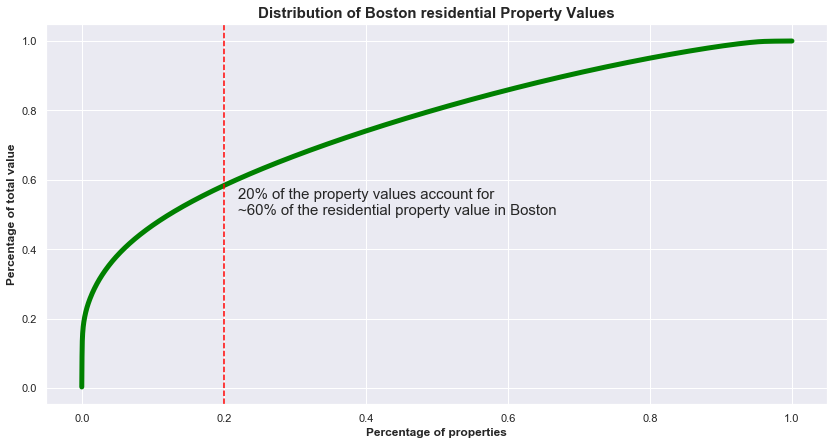

In [19]:
# Cumulative sum plot for property values

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot((prop_values_cum.index) / (len(prop_values_cum)), prop_values_cum, linewidth=5, color='green')
ax.set_xlabel('Percentage of properties', fontweight='bold')
ax.set_ylabel('Percentage of total value', fontweight='bold')
ax.set_title('Distribution of Boston residential Property Values', fontsize=15, fontweight='bold')
ax.axvline(0.2, c='red', linestyle='dashed')
ax.text(0.22, 0.5, "20% of the property values account for \n~60% of the residential property value in Boston", fontsize=15)

plt.show()

In [20]:
top_20_percentile = property_2018_res[property_2018_res['AV_TOTAL'] > property_2018_res['AV_TOTAL'].quantile(0.8)]

In [21]:
top_20_percentile.Neighborhood.value_counts().divide(len(top_20_percentile))[:10]

Back Bay                             0.164292
South End                            0.095553
South Boston                         0.094408
Jamaica Plain                        0.082486
Brighton                             0.081484
Charlestown                          0.060969
Back Bay / Fenway                    0.048904
Downtown Crossing / Fin. District    0.036983
West End                             0.036875
Chinatown / Tufts Medical            0.036446
Name: Neighborhood, dtype: float64

Of the values that are in the top 20 percentile, Back Bay has by far the most, accounting for more than 1 in 5 (after accounting for the Back Bay / Fenway too). This isn't necessarily representative of the average value since it may be that Back Bay simply has more properties than a place like Beacon Hill, which as we'll see below, has the highest median property value.

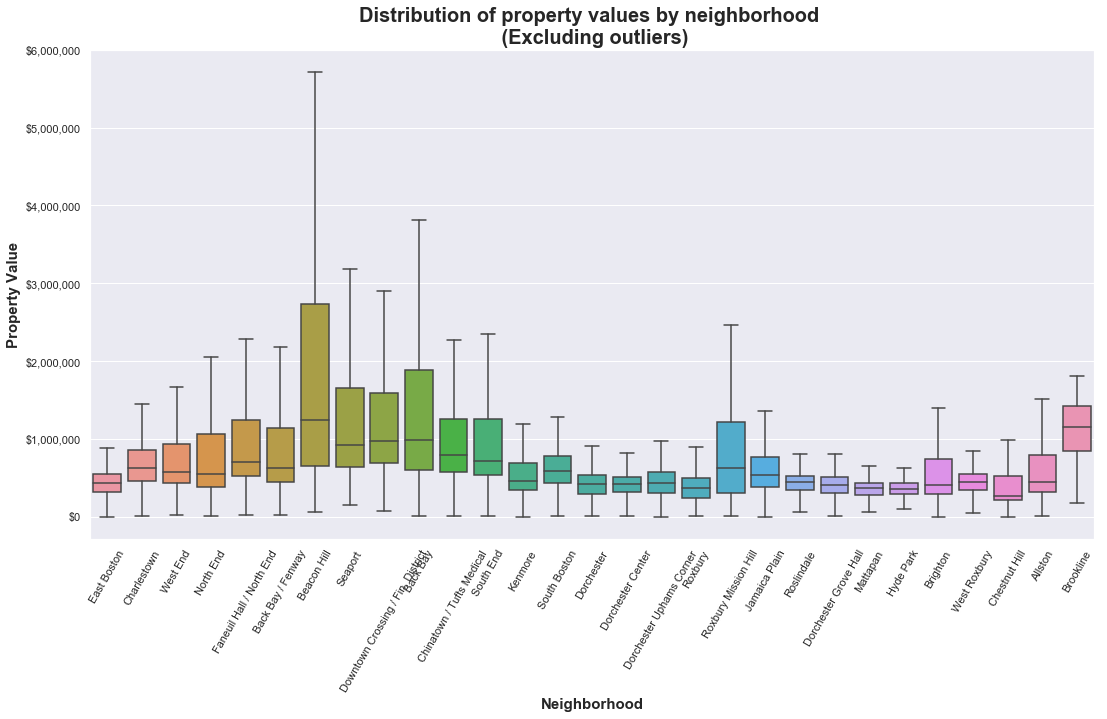

In [23]:
## Plot the distribution of property values

import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(18, 9))
ax = sns.boxplot(x="Neighborhood", y="AV_TOTAL", data=property_2018_res, showfliers=False)
ax.set_xlabel('Neighborhood', fontweight='bold', fontsize=15)
ax.set_ylabel('Property Value', fontweight='bold', fontsize=15)
ax.set_title('Distribution of property values by neighborhood \n (Excluding outliers)',fontweight='bold', fontsize=20)
ax.xaxis.set_tick_params(rotation=60)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

As expected, the property values show significant variation by neighborhood, both in the variance/distribution of the values as well as the median value. We see that Beacon Hill has the highest median value - > $1,000,000 - while a neighborhood like Hyde Park has a much tighter distribution as well as one of the lower median property values.

In [24]:
## Boston's most valuable property

property_2018_res[property_2018_res.index == property_2018_res['AV_TOTAL'].idxmax()]

,PID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,OWN_OCC,OWNER,MAIL_ADDRESS,MAIL_ZIPCODE,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,STRUCTURE_CLASS,R_BLDG_STYL,R_EXT_FIN,R_TOTAL_RMS,R_BDRMS,R_FULL_BTH,R_HALF_BTH,R_BTH_STYLE,R_BTH_STYLE2,R_BTH_STYLE3,R_KITCH_STYLE,R_KITCH_STYLE2,R_KITCH_STYLE3,R_EXT_CND,R_OVRALL_CND,R_INT_CND,R_INT_FIN,R_VIEW,S_NUM_BLDG,S_BLDG_STYL,S_UNIT_RES,S_UNIT_COM,S_UNIT_RC,S_EXT_FIN,S_EXT_CND,U_BASE_FLOOR,U_NUM_PARK,U_CORNER,U_ORIENT,U_TOT_RMS,U_BDRMS,U_FULL_BTH,U_HALF_BTH,U_BTH_STYLE,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_INT_FIN,U_INT_CND,U_VIEW,luxury,Neighborhood
16322,300449000,1 25,EMERSON,PL,NaN,2114.0,13,RC,N,ERP OPERATING LP,PO BOX A-87407,60680,123140900,226928600,350069500,449321204,225409.0,2007.0,NaN,15840.0,15840.0,3.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,West End


It turns out this property is a large commercial development in the West End recently built in 2007. While a single property for tax purposes, it's actually a series of properties at the same address owned by the single entity.

In [25]:
## Total value of residential properties

print('The total taxable value of residential properties in Boston is: ${0:,}'.format(property_2018_res['AV_TOTAL'].sum()))

The total taxable value of residential properties in Boston is: $113,057,142,300


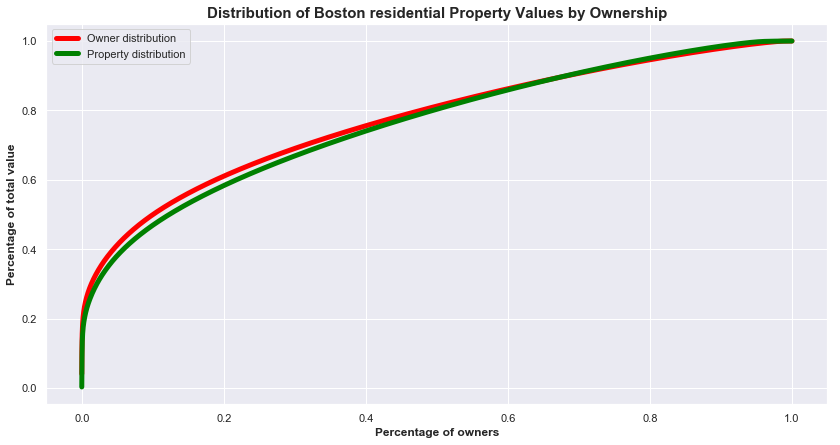

In [26]:
# Distribution of value by ownership

grpd_prop = property_2018_res.groupby(by='OWNER')
grpd_prop_vals = np.cumsum(grpd_prop['AV_TOTAL'].sum().sort_values(ascending=False)) \
                  .divide(property_2018_res['AV_TOTAL'].sum())

grpd_prop_vals.index = range(len(grpd_prop_vals))

# Cumulative sum plot for property values

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot((grpd_prop_vals.index) / (len(grpd_prop_vals)), grpd_prop_vals, linewidth=5, color='red', label='Owner distribution')
ax.plot((prop_values_cum.index) / (len(prop_values_cum)), prop_values_cum, linewidth=5, color='green', 
        label='Property distribution')
ax.set_xlabel('Percentage of owners', fontweight='bold')
ax.set_ylabel('Percentage of total value', fontweight='bold')
ax.set_title('Distribution of Boston residential Property Values by Ownership', fontsize=15, fontweight='bold')
plt.legend()

plt.show()

We don't see a significant deviation in the distribution of property values individually and by owner. In other words, surprisingly, we don't see a significant concentration of property in the hands of investors or other ownership groups.

# Most valuable streets

In [27]:
## Filter for streets with more than 20 listed properties

more_20 = property_2018_res.groupby(by='ST_NAME')['PID'].count()
more_20 = [i for i in more_20.index if more_20[i] >= 20]

In [28]:
## Filter the values and get the median value of each street, then create a data frame

more_20_streets = property_2018_res[property_2018_res.ST_NAME.isin(more_20)]
more_20_streets = more_20_streets.groupby(by='ST_NAME')['AV_TOTAL'].median().sort_values(ascending=False)

more_20_streets = pd.DataFrame(more_20_streets)

In [29]:
## Merge the street name and neighborhood into our filtered data frame, then remove duplicate values

more_20_streets = pd.merge(more_20_streets, property_2018_res[['ST_NAME','Neighborhood']], left_on = more_20_streets.index\
                           , right_on = 'ST_NAME', copy=False, how='left')

more_20_streets = more_20_streets.drop_duplicates(keep='first', subset=['ST_NAME'])

In [30]:
more_20_streets.head(10)

,AV_TOTAL,ST_NAME,Neighborhood
0,8236450.0,LOUISBURG,Beacon Hill
28,3104500.0,LIME,Beacon Hill
51,3084100.0,CHARLES RIVER,West End
79,2913900.0,LIBERTY,Seaport
192,2246650.0,BELVIDERE,Back Bay
254,2051950.0,ROWES WHARF,Downtown Crossing / Fin. District
348,2042300.0,BATTERY WHARF,Faneuil Hall / North End
452,1820900.0,BATTERY,Faneuil Hall / North End
564,1790450.0,ST CHARLES,Back Bay
584,1768800.0,STUART,Back Bay


In [31]:
more_20_streets.tail(10)

,AV_TOTAL,ST_NAME,Neighborhood
124324,176750.0,BROOKFORD,Dorchester Uphams Corner
124348,165650.0,DENNIS,Roxbury
124374,160950.0,HAYES,Roslindale
124420,150100.0,ALPINE,Roxbury
124498,143811.0,BROWNING,Dorchester Center
124525,140150.0,TOWNSEND,Roxbury
124609,110150.0,HIGH VIEW,West Roxbury
124635,104700.0,SENATOR BOLLING,Dorchester Center
124664,79050.0,WILLET,West Roxbury
124684,41254.0,ALEXANDER,Dorchester Uphams Corner


We'll now transition into the prediction phase of the project! This starts with cleaning and pre-processing the data, followed by feature engineering, feature selection, and model tuning.

For the sake of processing locally (reducing the number of properties we're predicting) and creating a model that is scalable to the majority of properties (not being overly influenced by outliers), I've filtered for only condos and the properties that are in the 98.5th percentile of property values (

# Predicting Property Value

In [32]:
## Import pre-processing libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Import regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

## Import model feature testing libraries

from sklearn.decomposition import PCA

## Import scoring libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [33]:
## Create a copy of the data frame

predict_df = property_2018_res.copy().reset_index(drop=True)

In [34]:
## Filter for only condo units

predict_df = predict_df.loc[predict_df.LU == 'CD',:]

In [35]:
## Sample the new data

predict_df.sample(5)

,PID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,OWN_OCC,OWNER,MAIL_ADDRESS,MAIL_ZIPCODE,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,STRUCTURE_CLASS,R_BLDG_STYL,R_EXT_FIN,R_TOTAL_RMS,R_BDRMS,R_FULL_BTH,R_HALF_BTH,R_BTH_STYLE,R_BTH_STYLE2,R_BTH_STYLE3,R_KITCH_STYLE,R_KITCH_STYLE2,R_KITCH_STYLE3,R_EXT_CND,R_OVRALL_CND,R_INT_CND,R_INT_FIN,R_VIEW,S_NUM_BLDG,S_BLDG_STYL,S_UNIT_RES,S_UNIT_COM,S_UNIT_RC,S_EXT_FIN,S_EXT_CND,U_BASE_FLOOR,U_NUM_PARK,U_CORNER,U_ORIENT,U_TOT_RMS,U_BDRMS,U_FULL_BTH,U_HALF_BTH,U_BTH_STYLE,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_INT_FIN,U_INT_CND,U_VIEW,luxury,Neighborhood
59326,1001783026,246,S HUNTINGTON,AV,246 &,2115.0,102,CD,Y,KERR EVA,246 S HUNTINGTON AV #246-12A,02130,0,274400,274400,287572,582.0,1935.0,1986.0,582.0,582.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,N,A,3,1.0,1.0,0,S,NaN,NaN,F,S,N,A,A,0,Back Bay / Fenway
25529,401037668,100,BELVIDERE,ST,7D,2116.0,102,CD,N,HARRIS JAY,100 BELVIDERE ST #7D,02116,0,1842200,1842200,1930626,1493.0,2001.0,2001.0,1493.0,1493.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,Y,A,5,2.0,2.0,0,L,M,NaN,O,M,E,E,G,1,Back Bay
55594,900685004,748 A748,TREMONT,ST,1,2118.0,102,CD,Y,CUTLER SHANE,748 TREMONT STREET UNIT #1,02118,0,525400,525400,550620,776.0,1901.0,1960.0,776.0,776.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,N,T,4,1.0,1.0,0,S,NaN,NaN,O,S,N,A,A,0,South End
24802,400699014,216,W CANTON,ST,216-3,2116.0,102,CD,N,GIARDINA ROBERT P,1116 E PALMER AV #20,91205,0,321300,321300,336722,338.0,1860.0,1984.0,338.0,338.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,N,A,1,0.0,1.0,0,S,NaN,NaN,P,S,N,G,F,0,Back Bay
48771,701029004,21,THOMAS,PK,2,2127.0,102,CD,Y,PRENSKY MICHAEL,21 THOMAS PK #2,02127,0,735400,735400,770700,1201.0,1875.0,2001.0,1201.0,1201.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,N,T,5,2.0,1.0,1,M,M,NaN,O,M,N,G,G,0,South Boston


In [36]:
## Create unique street values and create a variable for being on an expensive or cheap street

predict_df['full_street'] = predict_df.ST_NAME + ' ' + predict_df.ST_NAME_SUF

expensive_streets = predict_df.groupby(by='full_street')['AV_TOTAL'].median().sort_values(ascending=False)

predict_df['expensive_street'] = np.where(predict_df['full_street'].isin(expensive_streets[:int(len(expensive_streets)*0.15)].\
                                                                         index), 1, 0)

predict_df['cheaper_street'] = np.where(predict_df['full_street'].isin(expensive_streets[-int(len(expensive_streets)*0.15):].\
                                                                      index), 1, 0)

In [37]:
## Fill in the places that have not been remodeled with their year built, then fill any of the year remodel values
## that are 0 with their year built. 

predict_df['YR_REMOD'].fillna(predict_df['YR_BUILT'], inplace=True)

predict_df['YR_REMOD'] = np.where(predict_df['YR_REMOD'] == 0, predict_df['YR_BUILT'], predict_df['YR_REMOD'])

In [38]:
## Create a new variable for the number of years since the place was remodeled

predict_df['years_since_remod'] = datetime.datetime.now().year - predict_df.YR_REMOD

In [39]:
## Drop any units that do not have an associated year built and filter out any outliers using 300 years as the benchmark.

predict_df.dropna(subset=['YR_BUILT'], inplace=True)

predict_df = predict_df[predict_df.years_since_remod < 300]

In [40]:
## Define the initial continuous/non-categorical columns

continuous_cols = ['LIVING_AREA','U_BASE_FLOOR', 'U_BDRMS', 'years_since_remod']

count       62590
mean       642747
std        710262
min         30100
25%        319800
50%        459000
75%        683900
max      33727536
Name: AV_TOTAL, dtype: int32

The 98.5 percentile of values is: 3020728


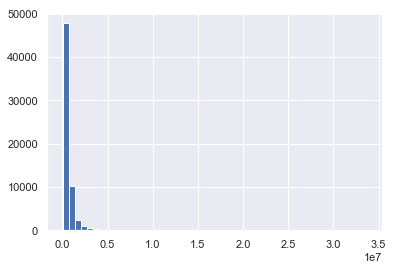

In [41]:
## Look at the distribution of the AV_TOTAL column

print(predict_df.AV_TOTAL.describe().astype(int))
print('\nThe 98.5 percentile of values is: %i' %predict_df.AV_TOTAL.quantile(.985))

plt.hist(predict_df.AV_TOTAL, bins=50)
plt.show()

The data shows a small number of outliers that have the potential to have significant influence. The mean is significantly higher than the median, showing that outliers on the upper end are having a significant influence on the mean. For example, the max is over $30M, but the 98.5 percentile is just over 2M. For this reason, we'll apply one last filter to the data for our prediction values.

In [42]:
## Drop na values and use only the 98.5% of variables

predict_df = predict_df.dropna(subset=continuous_cols, axis=0)

predict_df = predict_df[predict_df.AV_TOTAL < predict_df['AV_TOTAL'].quantile(.985)]

# Baseline model

So that we can give additional relative magnitude to the accuracy of the predictions below, we'll create a baseline error metric that simply gives the average condo value as the prediction for each value, then we'll compute the mean absolute error, root mean squared error, and R2, all of which will be compared to future models. 

The objective will be to not only minimize the errors, but also to see the magnitude by which we can improve on the an elementary guess.

In [43]:
## Calculate the mean of the predict column and associated error metrics

asset_mean = np.mean(predict_df.AV_TOTAL)

predict_df['asset_mean'] = asset_mean

mean_mae = mean_absolute_error(predict_df.AV_TOTAL, predict_df.asset_mean)
mean_rmse = mean_squared_error(predict_df.AV_TOTAL, predict_df.asset_mean) ** (1/2)

In [44]:
print("The mean MAE is: {0:.2f}".format(mean_mae))
print('The mean RMSE is: {0:.2f}'.format(mean_rmse))

The mean MAE is: 290380.25
The mean RMSE is: 433306.99


# Model function

Below I'll create the code to make model testing easy each time we include different variables. The models used are a simple linear model, a Random Forest regression, KNeighbors Regression, and Gradient Boosting Regressor.

Initial thoughts are that the KNeighbors will be a strong candidate because we'd expect similar types of houses to sell for similar values. Likewise, the tree-based nature of a random forest model should also be a good predictor.

In [45]:
def model_testing(df, y=predict_df['AV_TOTAL']):
    
    train_X, test_X, train_y, test_y = train_test_split(df, y, test_size=0.3, random_state=44)
    
    linear_model = LinearRegression()
    random_for = RandomForestRegressor(n_estimators=100, random_state=66)
    knr = KNeighborsRegressor()
    gbr = GradientBoostingRegressor(random_state=66)
    
    models = [linear_model, random_for, knr, gbr]
    
    maes = []
    scores = []
    rmses = []
    model_labels = ['Linear','Random Forest','KNeighbors', 'Gradient Boosting']
    
    for model in models:
    
        model.fit(train_X, train_y)
    
        predictions = model.predict(test_X)
        mae = mean_absolute_error(test_y, predictions)
        score = model.score(test_X, test_y)
        rmse = mean_squared_error(test_y, predictions) ** (1/2)
        
        maes.append(mae)
        scores.append(score)
        rmses.append(rmse)
        
    results_df = pd.DataFrame(data=[maes, scores, rmses], columns=model_labels).T
    results_df.columns = ['MAE_' + str(df.name),'Score_' + str(df.name),'RMSE_' + str(df.name)]
            
    return results_df

In [46]:
## Scale the continuous variables using Standard Scaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(predict_df[continuous_cols]))
X_scaled.name = 'continuous_variables'

In [47]:
## Test the models with only the continous variables

continuous_variables_models = model_testing(X_scaled)

In [48]:
continuous_variables_models

,MAE_continuous_variables,Score_continuous_variables,RMSE_continuous_variables
Linear,209996.741372,0.508241,304349.400974
Random Forest,148712.087532,0.684516,243772.707805
KNeighbors,164153.036486,0.634318,262451.043643
Gradient Boosting,172358.402725,0.658003,253809.184206


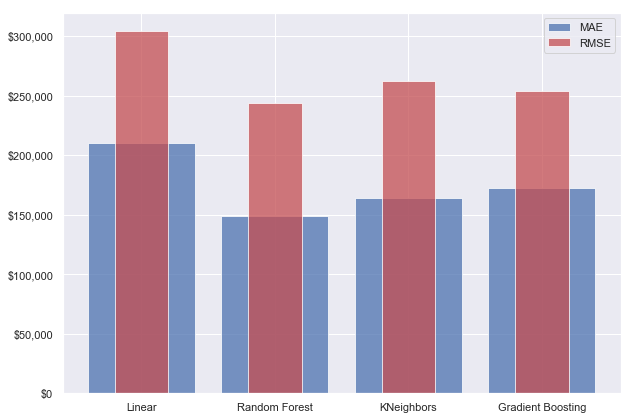

In [49]:
## Plot the MAE and RMSE values for our first model

width = 0.8

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

plt.bar(continuous_variables_models.index, continuous_variables_models['MAE_continuous_variables'], 
        width=width, color='b', alpha=0.75, label='MAE')

plt.bar(continuous_variables_models.index, continuous_variables_models['RMSE_continuous_variables'], 
        width=0.5*width, color='r', alpha=0.75, label='RMSE')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.legend()

plt.show()

The first pass is...not very effective at all. The fit as measured by the R2 score is nothing special and the error values are extremely high. The "Average" prediction is off by over \$200K with a simple linear regression and the best predictor is still $150K off, on average.

Likewise, the Root Mean Square Error, which sums the square of each error then takes the square root, is even higher. The goal of this metric is to penalize larger errors by magnifying their value. This indicates that some of our predictions are fairly large in value and that we have some work to do to improve the model's performance.

# Categorical variables

There are many additional categorical variables that we can bring into the model that will likely significantly improve the output. The process I'll take will be to iteratively add variables with each new dataset adding to the prior, test the model, continue to add features, then once I've exhausted the direct and indirect (artificially created) variables, I'll pair back the variables to solve for the issue of multiple variables being correlated to each other (multi-collinearity).

In [50]:
## Begin by adding the variable for the neighborhood

neighbor_dummies = pd.get_dummies(predict_df.Neighborhood)
neighborhood_df = pd.concat([predict_df, neighbor_dummies], axis=1)

neighborhood_df = pd.concat([X_scaled, 
                          neighborhood_df.loc[:,'Allston':'West Roxbury'].reset_index(drop=True)], axis=1)

neighborhood_df.name = 'continuous_plus_neighborhood'

In [51]:
## Run the models on the new data

continuous_plus_neighborhood = model_testing(neighborhood_df)

In [52]:
continuous_plus_neighborhood

,MAE_continuous_plus_neighborhood,Score_continuous_plus_neighborhood,RMSE_continuous_plus_neighborhood
Linear,145595.789760,0.743998,219592.599649
Random Forest,63135.721594,0.927527,116838.142990
KNeighbors,71841.757102,0.913088,127948.977414
Gradient Boosting,107223.990240,0.848740,168794.390855


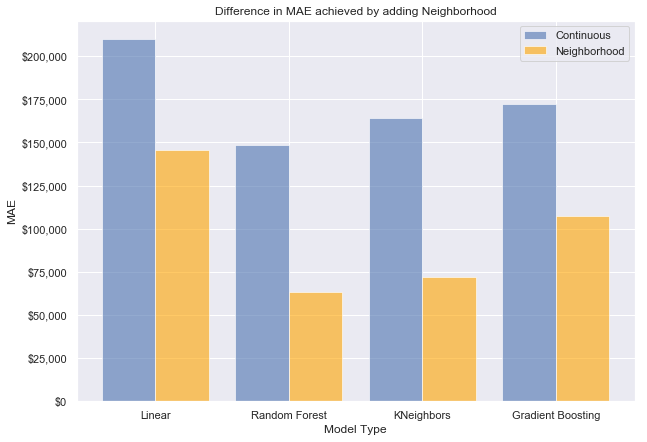

In [53]:
## Plot the difference between our first prediction and the second

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

plt.bar(continuous_variables_models.index, continuous_variables_models['MAE_continuous_variables'], 
        width=-0.4, color='b', alpha=0.60, label='Continuous', align='edge')

plt.bar(continuous_variables_models.index, continuous_plus_neighborhood['MAE_continuous_plus_neighborhood'], 
        width=0.4, color='orange', alpha=0.60, label='Neighborhood', align='edge')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.title('Difference in MAE achieved by adding Neighborhood')
plt.ylabel('MAE')
plt.xlabel('Model Type')

plt.legend()

plt.show()

Wow! One additional categorical variable drastically improved the results across all categories. The average error dropped by \$60K-\$65K for the simple linear model and ~\$90K for the Random Forest and KNeighbors. Likewise, the R2 jumped across the board.

Now, we'll continue to build on it by seeing what other variables may have an impact.

Everyone loves a view, so we'll continue by adding the "U_VIEW" categorical column, which ranges from P (Poor) to E (Excellent) and S (Special). The idea would be that, all else equal, a better view would increase the value of the asset.

In [54]:
## Create dummy variables and create a new data frame with the continuous and categorical variables

view_dummies = pd.get_dummies(predict_df.U_VIEW, prefix='View')
view_df = pd.concat([predict_df, view_dummies], axis=1)

view_df = pd.concat([(X_scaled), view_df.loc[:,'View_A':'View_S'].reset_index(drop=True)], axis=1)

view_df = pd.concat([view_df, neighbor_dummies.reset_index(drop=True)], axis=1)

view_df.name = 'continuous_neighborhood_view'

In [55]:
## Test the model

continuous_neighborhood_view = model_testing(view_df)

In [56]:
continuous_neighborhood_view

,MAE_continuous_neighborhood_view,Score_continuous_neighborhood_view,RMSE_continuous_neighborhood_view
Linear,140944.623334,0.762273,211609.669708
Random Forest,61132.586254,0.931807,113335.571195
KNeighbors,70315.305553,0.915913,125852.538437
Gradient Boosting,104435.363867,0.859576,162635.960580


The view variable made a slight impact on our results but not nearly as noteworthy as the neighborhood variable. This could be because the majority of condos have an "average" or "good" (combined 90% of the values) and only about 5% have an Excellent or Special view. Without significant variation in the variable, we wouldn't expect it to have an outsize impact.

We'll next turn to the "Orient" variable. This describes the direction of the condo ("Rear Above", "Rear Below", "Through", to name a few). In EDA, it was shown to correlate with the AV_TOTAL column.

In [57]:
## The U_ORIENT column had a few lowercase values, so standardizing the values ensures that when we convert to
## dummy variables, all of the same variables will properly group.

predict_df['U_ORIENT'] = [i.upper() for i in predict_df['U_ORIENT']]

In [58]:
## Create the dummy variables and add to the data frame

orient_dummies = pd.get_dummies(predict_df.U_ORIENT, prefix='Orient')
orient_df = pd.concat([view_df, orient_dummies.reset_index(drop=True)], axis=1)

orient_df.name = 'cont_neigh_view_orient'

In [59]:
## Run the model

cont_neigh_view_orient = model_testing(orient_df)

In [60]:
cont_neigh_view_orient

,MAE_cont_neigh_view_orient,Score_cont_neigh_view_orient,RMSE_cont_neigh_view_orient
Linear,140993.931441,0.762571,211477.220516
Random Forest,59802.599238,0.933840,111633.398687
KNeighbors,71838.508516,0.912901,128086.174894
Gradient Boosting,104644.452430,0.858808,163080.141034




The orient variable had mixed results. The linear models were constant, Random Forest improved slightly, and KNeighbors and Gradient Boosting were also unchanged. It likely isn't that important of a variable.

At this point, we've added the categorical variables that correlated with AV_TOTAL and have mostly exhausted our direct data opportunities. From here forward, we'll see whether feature engineering - creating new data from our current variables and/or pulling in other relevant data - can improve the model.

We'll start by adding whether the street is classified as "Expensive" or "Cheap" based on our earlier variable creation.



In [61]:
## Add the expensive and cheap binary variable to the most recent dataset. 

street_df = orient_df.copy()
street_df['expensive_street'] = predict_df['expensive_street'].values
street_df['cheaper_street'] = predict_df['cheaper_street'].values

street_df.name = 'cont_neigh_view_orient_street'

In [62]:
## Run the model

cont_neigh_view_orient_street = model_testing(street_df)

In [63]:
cont_neigh_view_orient_street

,MAE_cont_neigh_view_orient_street,Score_cont_neigh_view_orient_street,RMSE_cont_neigh_view_orient_street
Linear,140034.837524,0.764427,210648.933657
Random Forest,57367.435119,0.938463,107662.922234
KNeighbors,69397.610554,0.918909,123589.808230
Gradient Boosting,100869.365039,0.865766,159011.109948


We see marginal improvement again here in a few of our models. This means that either the variable isn't important, or the essence of the variable is already captured in other variables that we have.

Next, we'll try another variable created called "Luxury". This variable was created by looking at the stated Bath and Kitchen style and, if either is marked as "Luxury", the binary 1 is activated, and otherwise the value is 0. In total, about 6% of properities were classified as luxury.

In [64]:
## Copy the last data frame and add the luxury variable

luxury_df = street_df.copy()
luxury_df['luxury'] = predict_df.luxury.values

luxury_df.name = 'cont_neigh_view_orient_street_lux'

In [65]:
## Test the model

cont_neigh_view_orient_street_lux = model_testing(luxury_df)

In [66]:
cont_neigh_view_orient_street_lux

,MAE_cont_neigh_view_orient_street_lux,Score_cont_neigh_view_orient_street_lux,RMSE_cont_neigh_view_orient_street_lux
Linear,127826.531062,0.802572,192841.493823
Random Forest,56152.623951,0.941117,105315.257747
KNeighbors,67878.204369,0.925499,118461.416654
Gradient Boosting,96940.845037,0.882218,148948.629097


The luxury variable had a moderate impact relative to the prior few that were tested. Our linear model dropped by about $13K, on average, while the others dropped proportionality as well.

We'll start to get more creative with our variables at this point. In conversation with a colleague about something separate for a project he was working on, he brought up that he was going to add zip-code level data. I thought that would be an interesting application to bring in here, specifically looking at the average income of residents within each of our neighborhoods and the total population.

As it happens, there was a package created that, for each zip code, pulls in government data relating to income, geography, population density, and area.

In [67]:
## Import the libraries required for this variable

import uszipcode
from uszipcode import ZipcodeSearchEngine

In [68]:
## Extract the unique zip codes in our data and add the preceding 0 to align the style of our zip code with the 
## zip codes from the package

zips = ['0' + str(int(i)) for i in predict_df.ZIPCODE.unique()]

In [69]:
## Loop through our unique zip codes and store the data in a list

zips_list = []

for zipcode in zips:
    
    search = ZipcodeSearchEngine()
    zippy = search.by_zipcode(zipcode)
    zips_list.append(zippy)

In [70]:
## Sample of the information that we can pull for each zip code

zips_list[0]

{"City": "Boston", "Density": 8352.164948453608, "HouseOfUnits": 15854, "LandArea": 4.85, "Latitude": 42.3695431, "Longitude": -71.0200613, "NEBoundLatitude": 42.398275899999994, "NEBoundLongitude": -70.9824941, "Population": 40508, "SWBoundLatitude": 42.3467989, "SWBoungLongitude": -71.060957, "State": "MA", "TotalWages": 545015569.0, "WaterArea": 1.14, "Wealthy": 13454.51686086699, "Zipcode": "02128", "ZipcodeType": "Standard"}

In [71]:
## Extract the information contained in each list entry as a dictionary and convert it to a data frame

zips_df = pd.DataFrame()

for i in range(len(zips_list)):
    
    df = pd.DataFrame(zips_list[i].items()).T.iloc[1,:]
    zips_df = zips_df.append(df)

In [72]:
## Properly title each column of the new data frame

zip_cols = ['ZipCode','ZipCodeType','City','State','Population','Density','TotalWages','Wealthy','HouseOfUnits','LandArea',
           'WaterArea','Latitude','Longitude','NEBoundLatitude','NEBoundLongitude','SWBoundLatitude','SWBoundLongitude']

zips_df.columns = zip_cols
zips_df.set_index('ZipCode',inplace=True)

In [73]:
## Create new zip code prediction data frame and scale the continuous values
zips_predict = zips_df.loc[:,['Population','Wealthy']]
zips_predict = scaler.fit_transform(zips_predict)

zips_predict = pd.DataFrame(zips_predict)
zips_predict.index = zips_df.index
zips_predict.columns = ['Population','Wealthy']

In [74]:
## Create a copy of the prior data and merge the zip code values onto each entry in our data

zips_df = luxury_df.copy()
zips_df['zip_code'] = predict_df.loc[:,'ZIPCODE'].values

zips_df['zip_code'] = ['0'+str(int(i)) for i in zips_df['zip_code']]

zips_df = zips_df.merge(zips_predict, left_on='zip_code', right_index=True, copy=False, validate='m:m', how='left')

del zips_df['zip_code']

zips_df.name = 'with_pop_data'

In [75]:
## Test the model

with_pop_data = model_testing(zips_df)

In [76]:
with_pop_data

,MAE_with_pop_data,Score_with_pop_data,RMSE_with_pop_data
Linear,127829.110354,0.802572,192841.518026
Random Forest,52903.418537,0.949683,97354.216773
KNeighbors,67405.543909,0.927041,117228.857200
Gradient Boosting,84496.784424,0.907812,131775.286766


The addition of the population and wealth data had mixed effects. The Random Forest and Gradient Boosting model saw improvements, while the other 3 were largely unchanged.

Next, we'll continue to pull in outside data at a zip-code level. This time, we'll be looking on a demographic level at the composition of each community. After searching for a good amount of time, I came upon trusted government data that would fit what I was looking for. It has a large amount of variables relating to sex, age, and race. For the sake of this analysis, I've only used a few, but there are many additional options.

In [77]:
## Read in the new demographics data set and look at a sample of the results

demographics_df = pd.read_csv(r'C:\Users\jbean\Dropbox\Other\Python\Boston Data\demographic_data.csv', low_memory=False)

demographics_df.sample(5)

,Geography,SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,SEX AND AGE - Total population - Male,Percent; SEX AND AGE - Total population - Male,SEX AND AGE - Total population - Female,Percent; SEX AND AGE - Total population - Female,SEX AND AGE - Under 5 years,Percent; SEX AND AGE - Under 5 years,SEX AND AGE - 5 to 9 years,Percent; SEX AND AGE - 5 to 9 years,SEX AND AGE - 10 to 14 years,Percent; SEX AND AGE - 10 to 14 years,SEX AND AGE - 15 to 19 years,Percent; SEX AND AGE - 15 to 19 years,SEX AND AGE - 20 to 24 years,Percent; SEX AND AGE - 20 to 24 years,SEX AND AGE - 25 to 34 years,Percent; SEX AND AGE - 25 to 34 years,SEX AND AGE - 35 to 44 years,Percent; SEX AND AGE - 35 to 44 years,SEX AND AGE - 45 to 54 years,Percent; SEX AND AGE - 45 to 54 years,SEX AND AGE - 55 to 59 years,Percent; SEX AND AGE - 55 to 59 years,SEX AND AGE - 60 to 64 years,Percent; SEX AND AGE - 60 to 64 years,SEX AND AGE - 65 to 74 years,Percent; SEX AND AGE - 65 to 74 years,SEX AND AGE - 75 to 84 years,Percent; SEX AND AGE - 75 to 84 years,SEX AND AGE - 85 years and over,Percent; SEX AND AGE - 85 years and over,SEX AND AGE - Median age (years),Percent; SEX AND AGE - Median age (years),SEX AND AGE - 18 years and over,Percent; SEX AND AGE - 18 years and over,SEX AND AGE - 21 years and over,Percent; SEX AND AGE - 21 years and over,SEX AND AGE - 62 years and over,Percent; SEX AND AGE - 62 years and over,SEX AND AGE - 65 years and over,Percent; SEX AND AGE - 65 years and over,SEX AND AGE - 18 years and over.1,Percent; SEX AND AGE - 18 years and over.1,SEX AND AGE - 18 years and over - Male,Percent; SEX AND AGE - 18 years and over - Male,SEX AND AGE - 18 years and over - Female,Percent; SEX AND AGE - 18 years and over - Female,SEX AND AGE - 65 years and over.1,Percent; SEX AND AGE - 65 years and over.1,SEX AND AGE - 65 years and over - Male,Percent; SEX AND AGE - 65 years and over - Male,SEX AND AGE - 65 years and over - Female,Percent; SEX AND AGE - 65 years and over - Female,RACE - Total population,Percent; RACE - Total population,RACE - Total population - One race,Percent; RACE - Total population - One race,RACE - Total population - Two or more races,Percent; RACE - Total population - Two or more races,RACE - One race,Percent; RACE - One race,RACE - One race - White,Percent; RACE - One race - White,RACE - One race - Black or African American,Percent; RACE - One race - Black or African American,RACE - One race - American Indian and Alaska Native,Percent; RACE - One race - American Indian and Alaska Native,RACE - One race - American Indian and Alaska Native - Cherokee tribal grouping,Percent; RACE - One race - American Indian and Alaska Native - Cherokee tribal grouping,RACE - One race - American Indian and Alaska Native - Chippewa tribal grouping,Percent; RACE - One race - American Indian and Alaska Native - Chippewa tribal grouping,RACE - One race - American Indian and Alaska Native - Navajo tribal grouping,Percent; RACE - One race - American Indian and Alaska Native - Navajo tribal grouping,RACE - One race - American Indian and Alaska Native - Sioux tribal grouping,Percent; RACE - One race - American Indian and Alaska Native - Sioux tribal grouping,RACE - One race - Asian,Percent; RACE - One race - Asian,RACE - One race - Asian - Asian Indian,Percent; RACE - One race - Asian - Asian Indian,RACE - One race - Asian - Chinese,Percent; RACE - One race - Asian - Chinese,RACE - One race - Asian - Filipino,Percent; RACE - One race - Asian - Filipino,RACE - One race - Asian - Japanese,Percent; RACE - One race - Asian - Japanese,RACE - One race - Asian - Korean,Percent; RACE - One race - Asian - Korean,RACE - One race - Asian - Vietnamese,Percent; RACE - One race - Asian - Vietnamese,RACE - One race - Asian - Other Asian,Percent; RACE - One race - Asian - Other Asian,RACE - One race - Native Hawaiian and Other Pacific Islander,Percent; RACE - One race - Native Hawaiian and Other Pacific Islander,RACE - One race - Native Hawaiian and Other 

In [78]:
## Replace the pre-zip code (Column name "Geography") characters, leaving only the 5-digit zip code

demographics_df['Geography'] = [str(i).replace('ZCTA5 ','') for i in demographics_df['Geography']]

In [79]:
## Align the format of the zip codes in our data with those in the new data and filter the data for only the zip codes
## that are in our data

predict_zips = ['0'+str(int(i)) for i in predict_df.ZIPCODE.unique()]

demographics_df = demographics_df[demographics_df.Geography.isin(predict_zips)]

In [80]:
## Convert columns to float values and then to a percentage

demo_cols_to_convert = ['Percent; SEX AND AGE - 20 to 24 years','Percent; SEX AND AGE - 25 to 34 years',
                       'Percent; SEX AND AGE - 35 to 44 years','Percent; SEX AND AGE - 45 to 54 years',
                       'Percent; SEX AND AGE - 55 to 59 years','Percent; SEX AND AGE - 60 to 64 years',
                       'Percent; SEX AND AGE - 65 to 74 years','Percent; SEX AND AGE - 75 to 84 years',
                       'Percent; SEX AND AGE - 85 years and over']

for col in demo_cols_to_convert:
    
    demographics_df[col] = demographics_df[col].astype(float)
    demographics_df[col] = demographics_df[col].divide(100)

In [81]:
## Add a variable to combine the 20-24 and 25-34 age ranges to capture the millennial generation

demographics_df['perc_20_to_34'] = demographics_df['Percent; SEX AND AGE - 20 to 24 years'] + demographics_df[\
                                    'Percent; SEX AND AGE - 25 to 34 years']

demographics_df['perc_35_to_60'] = demographics_df['Percent; SEX AND AGE - 35 to 44 years'] + demographics_df[\
                                    'Percent; SEX AND AGE - 45 to 54 years'] + demographics_df[\
                                    'Percent; SEX AND AGE - 55 to 59 years']

demographics_df['perc_61_plus'] = demographics_df['Percent; SEX AND AGE - 60 to 64 years'] + demographics_df[\
                                    'Percent; SEX AND AGE - 65 to 74 years'] + demographics_df[\
                                    'Percent; SEX AND AGE - 75 to 84 years'] + demographics_df[\
                                    'Percent; SEX AND AGE - 85 years and over']

In [82]:
## Extract the three variables that we'll add to our data. First is the percentage of the population that is white 
## (implicitly also showing the minority percentage) and the second group looks to segment a zip code by it's age buckets
## between millennials (20-34), more family-oriented from ages 35-60, and potentially retirees 61+

demographic_cols = ['Percent; RACE - Race alone or in combination with one or more other races - Total population - White',
                   'perc_20_to_34','perc_35_to_60', 'perc_61_plus', 'Geography']

In [83]:
## Create a copy of the past data and merge the new demographic information

demographics_pred = zips_df.copy()

demographics_pred['zip_code'] = predict_df.loc[:,'ZIPCODE'].values

demographics_pred['zip_code'] = demographics_pred['zip_code'].astype(int)
demographics_df['Geography'] = demographics_df['Geography'].astype(int)

demographics_pred = demographics_pred.merge(demographics_df[demographic_cols], left_on='zip_code', right_on='Geography',
                                           how='left', copy=False)

In [84]:
## Scale the new variables

del demographics_pred['Geography']
del demographics_pred['zip_code']

demographics_pred.loc[:,'Percent; RACE - Race alone or in combination with one or more other races - Total population - White':\
                     'perc_61_plus'] = scaler.fit_transform(demographics_pred.loc[:,\
                    'Percent; RACE - Race alone or in combination with one or more other races - Total population - White':\
                     'perc_61_plus'])

demographics_pred.name = 'with_demo_data'

In [85]:
## Test the model

with_demo_data = model_testing(demographics_pred)

In [86]:
with_demo_data

,MAE_with_demo_data,Score_with_demo_data,RMSE_with_demo_data
Linear,127823.595125,0.802574,192840.712530
Random Forest,53010.264265,0.949300,97724.080781
KNeighbors,67255.494361,0.927415,116928.287884
Gradient Boosting,79654.666209,0.915375,126254.312601


Despite the work to bring in the demographic data, we don't see a real significant improvement in most models. The Gradient Boosting saw a bit of a drop in MAE from ~84K to just below 80K with an improvement in the R2 score too. 

Now, we'll look to test for non-linear relationships between continuous variables and our predict variable. The goal will be to expand beyond our linear constraints to try and create a more flexible model. We'll create interaction variables up to the 3rd degree, then test whether our model improves.

In [87]:
## Create polynomial features

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)

poly_features = pd.DataFrame(poly.fit_transform(predict_df[continuous_cols]))

In [88]:
## Label the column correctly

poly_features.columns = poly.get_feature_names(input_features= continuous_cols)

In [89]:
## Delete an irrelevant column

del poly_features['1']

In [90]:
## View the new features in the data frame

poly_features.head()

,LIVING_AREA,U_BASE_FLOOR,U_BDRMS,years_since_remod,LIVING_AREA^2,LIVING_AREA U_BASE_FLOOR,LIVING_AREA U_BDRMS,LIVING_AREA years_since_remod,U_BASE_FLOOR^2,U_BASE_FLOOR U_BDRMS,U_BASE_FLOOR years_since_remod,U_BDRMS^2,U_BDRMS years_since_remod,years_since_remod^2,LIVING_AREA^3,LIVING_AREA^2 U_BASE_FLOOR,LIVING_AREA^2 U_BDRMS,LIVING_AREA^2 years_since_remod,LIVING_AREA U_BASE_FLOOR^2,LIVING_AREA U_BASE_FLOOR U_BDRMS,LIVING_AREA U_BASE_FLOOR years_since_remod,LIVING_AREA U_BDRMS^2,LIVING_AREA U_BDRMS years_since_remod,LIVING_AREA years_since_remod^2,U_BASE_FLOOR^3,U_BASE_FLOOR^2 U_BDRMS,U_BASE_FLOOR^2 years_since_remod,U_BASE_FLOOR U_BDRMS^2,U_BASE_FLOOR U_BDRMS years_since_remod,U_BASE_FLOOR years_since_remod^2,U_BDRMS^3,U_BDRMS^2 years_since_remod,U_BDRMS years_since_remod^2,years_since_remod^3
0,606.0,1.0,2.0,3.0,367236.0,606.0,1212.0,1818.0,1.0,2.0,3.0,4.0,6.0,9.0,222545016.0,367236.0,734472.0,1101708.0,606.0,1212.0,1818.0,2424.0,3636.0,5454.0,1.0,2.0,3.0,4.0,6.0,9.0,8.0,12.0,18.0,27.0
1,654.0,2.0,2.0,3.0,427716.0,1308.0,1308.0,1962.0,4.0,4.0,6.0,4.0,6.0,9.0,279726264.0,855432.0,855432.0,1283148.0,2616.0,2616.0,3924.0,2616.0,3924.0,5886.0,8.0,8.0,12.0,8.0,12.0,18.0,8.0,12.0,18.0,27.0
2,723.0,3.0,2.0,3.0,522729.0,2169.0,1446.0,2169.0,9.0,6.0,9.0,4.0,6.0,9.0,377933067.0,1568187.0,1045458.0,1568187.0,6507.0,4338.0,6507.0,2892.0,4338.0,6507.0,27.0,18.0,27.0,12.0,18.0,27.0,8.0,12.0,18.0,27.0
3,460.0,0.0,0.0,13.0,211600.0,0.0,0.0,5980.0,0.0,0.0,0.0,0.0,0.0,169.0,97336000.0,0.0,0.0,2750800.0,0.0,0.0,0.0,0.0,0.0,77740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2197.0
4,560.0,1.0,1.0,13.0,313600.0,560.0,560.0,7280.0,1.0,1.0,13.0,1.0,13.0,169.0,175616000.0,313600.0,313600.0,4076800.0,560.0,560.0,7280.0,560.0,7280.0,94640.0,1.0,1.0,13.0,1.0,13.0,169.0,1.0,13.0,169.0,2197.0


In [91]:
## Drop the original features because they will be in our copied data in the next step

poly_features.drop(['LIVING_AREA','U_BASE_FLOOR','U_BDRMS','years_since_remod'], axis=1, inplace=True)

In [92]:
## Copy the last data frame and incorporate our new features

poly_df = with_demo_data.copy()

poly_df = pd.concat([demographics_pred, poly_features], axis=1)

poly_df.name = 'with_poly_features'

In [93]:
## Test the model

with_poly_features = model_testing(poly_df)

In [94]:
with_poly_features

,MAE_with_poly_features,Score_with_poly_features,RMSE_with_poly_features
Linear,112909.521699,0.838261,174543.270248
Random Forest,55654.556346,0.944827,101943.145136
KNeighbors,178057.321514,0.555181,289459.490711
Gradient Boosting,79258.015103,0.915154,126419.008983


The polynomial features had a significant adverse affect on the KNeighbors regressor, while the Linear model saw relatively strong improvement relative to prior versions. The Random Forest error metrics are slightly higher while the Gradient Boosting is about the same.

Regardless, at this point, we see that we're only getting marginal improvement from our variables. We'll try just one more variation of the last data by applying a scaler to the variables to standardize between 0 and 1. We applied the scaler to the original continuous variables that we included, so having these new continuous features un-scaled could mean they're overemphasized in our result.

In [95]:
## Scale the polynomial-transformed features

poly_features_s = pd.DataFrame(scaler.fit_transform(poly_features))

In [96]:
## Add the relevant column names

poly_features_s.columns = poly_features.columns

In [97]:
## Create a copy of the data and test new features

poly_df_s = with_demo_data.copy()

poly_df_s = pd.concat([demographics_pred, poly_features_s], axis=1)

poly_df_s.name = 'with_poly_s'

In [98]:
## Test the model

with_poly_s = model_testing(poly_df_s)

In [99]:
with_poly_s

,MAE_with_poly_s,Score_with_poly_s,RMSE_with_poly_s
Linear,112878.453095,0.838298,174523.730626
Random Forest,55657.076973,0.944803,101965.502726
KNeighbors,72433.637545,0.908221,131482.374049
Gradient Boosting,79258.015103,0.915154,126419.008983


Other than normalizing the KNeighbors back in-line with the previous scale of the error, scaling the polynomial features doesn't appear to have made an impact on our results.

At this point, we'll move on from feature creation and engineering to feature selection.

# Feature Selection

While making features is useful to see how different features impact our model, our final result is not necessarily the optimal set of inputs. We may have multi-collinearity to address within our features (correlations within features), which would affect the relative magnitude of the coefficients of our linear model if we were to look at the impact of a change in one feature on the final output.

There are a few different ways to address feature selection. I'll try a couple and then analyze the results for a final set of features to tune the models. First will be Principal Component Analysis (PCA) which looks to reduce the number of dimensions based on the explained variance of features. Another approach will be using the SelectKBest function based on the results of the PCA to see how the model works on only the top features that explain the most variance. After looking at a variety of options for K, we'll determine the optimal number, then remove correlated columns, and analyze the results of the models with the reduced number of features.

In [100]:
## Find the number of columns contributing to the explained variance

pca = PCA()
pca.fit(poly_df_s, predict_df.AV_TOTAL)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

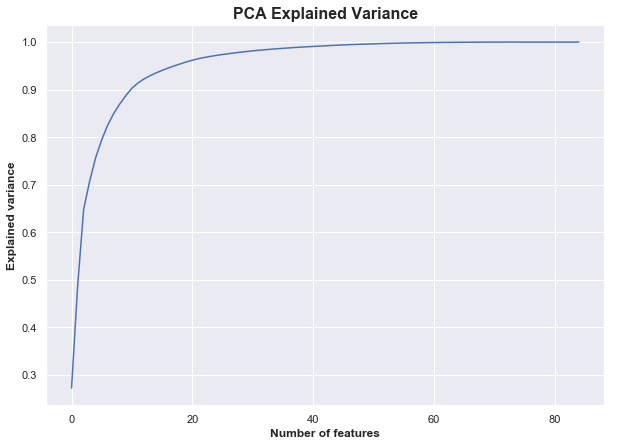

In [101]:
## Plot the cumulative variance

plt.figure(figsize=(10, 7))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained variance', fontweight='bold')
plt.xlabel('Number of features', fontweight='bold')
plt.title('PCA Explained Variance', fontweight='bold', fontsize=16)

plt.show()

We see that nearly 100% of the data's variance is explained by ~40 columns, so we'll re-fit the PCA to 40 components and transform our data using the compressed data, then test our model performance.

In [102]:
## Re-fitted PCA with 40 components

fitted_pca = pd.DataFrame(PCA(n_components=40).fit_transform(poly_df_s, predict_df.AV_TOTAL))

fitted_pca.name = 'pca_model'

In [103]:
## Fit the model to the new PCA reduced data

pca_model = model_testing(fitted_pca)

In [104]:
pca_model

,MAE_pca_model,Score_pca_model,RMSE_pca_model
Linear,123016.340151,0.809700,189328.333864
Random Forest,62741.870835,0.928965,115673.330962
KNeighbors,72711.081536,0.907524,131981.116854
Gradient Boosting,96364.825634,0.875876,152905.788604


Despite capturing a majority of the data's variance, we don't see an improvement in model performance with reduced features. Using the non-transformed data including polynomial features, the Random Forest had an MAE of ~55K, but that jumps up to ~63K here. The only model that was unaffected by the compressed data was the KNeighbors Regressor, which held constant at ~72.6K.

We'll transition to the SelectKBest approach and test our results. We'll create a function, loop through variance levels of K, and see which produces the best result.

In [105]:
## Define a function that tests different values of K and returns the results of our model testing

from sklearn.feature_selection import SelectKBest

def select_k_best_model_test(k):
    
    kbest = SelectKBest(k=k)

    best_k = pd.DataFrame(kbest.fit_transform(poly_df_s, predict_df.AV_TOTAL))
    
    mask = kbest.get_support() 
    new_features = []

    for bool, feature in zip(mask, list(poly_df_s.columns.values)):
    
        if bool:
            new_features.append(feature)
            
    best_k.columns = new_features
    best_k.name = 'results_best_k'
    
    return model_testing(best_k), best_k

In [106]:
## Print the length of the data frame for choosing different values of k

print(len(poly_df_s.columns))

85


In [107]:
## Assign values of k and examine the results for each

k_to_test = [20, 30, 40, 60, 84]

for i in k_to_test:
    
    result, df = select_k_best_model_test(i)
    
    print('The results for the best %i features' %i)
    print(result)
    print('\n')

The results for the best 20 features
                   MAE_results_best_k  Score_results_best_k  \
Linear                  151532.198498              0.735733   
Random Forest            64491.056492              0.931366   
KNeighbors               95694.047526              0.846278   
Gradient Boosting        91512.995655              0.891225   

                   RMSE_results_best_k  
Linear                   223109.300583  
Random Forest            113701.161690  
KNeighbors               170162.921819  
Gradient Boosting        143139.957400  


The results for the best 30 features
                   MAE_results_best_k  Score_results_best_k  \
Linear                  141365.912156              0.768970   
Random Forest            63173.742940              0.931506   
KNeighbors               89178.920519              0.865606   
Gradient Boosting        89826.096366              0.896604   

                   RMSE_results_best_k  
Linear                   208607.994839  
Rando

After testing the series of values, it looks like we can capture a majority of the model's predictive capabilities with about 3/4 of the data (60 features). With that in mind, we'll create a data frame with those features, test for correlation between columns, drop correlated columns, and test the model again.

In [108]:
## Generate the best_k data frame by using the function that we wrote above

results_best_k, best_k = select_k_best_model_test(k=60)

In [109]:
## Test for correlation in best model for k

corr_matrix = best_k.corr().abs()

## Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

## Find index of feature columns with correlation greater than 0.8

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [110]:
## Drop columns with a correlation about 0.8

best_k_consolidated = best_k.drop(to_drop, axis=1)

In [111]:
## Rename ambiguous columns and condense longer column name

best_k_consolidated.rename(columns={0:'LIVING_AREA',1:'U_BASE_FLOOR', 2:'U_BDRMS', 
                                    'Percent; RACE - Race alone or in combination with one or more other races - Total population - White':\
                                   'percentage_white'}, inplace=True)

best_k_consolidated.name = 'best_k_consolidated_models'

In [112]:
## Examine the condensed data set

best_k_consolidated.head()

,LIVING_AREA,U_BASE_FLOOR,U_BDRMS,View_A,View_E,View_G,View_S,Back Bay,Back Bay / Fenway,Beacon Hill,Brookline,Chestnut Hill,Chinatown / Tufts Medical,Dorchester Grove Hall,Downtown Crossing / Fin. District,Faneuil Hall / North End,Hyde Park,Mattapan,Seaport,South End,West End,West Roxbury,Orient_C,Orient_F,Orient_M,Orient_T,expensive_street,cheaper_street,luxury,Population,Wealthy,percentage_white,perc_20_to_34,perc_61_plus,LIVING_AREA years_since_remod,U_BASE_FLOOR years_since_remod,LIVING_AREA^2 years_since_remod
0,-0.869334,-0.500714,0.302563,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.480724,-0.754499,1.076202,-0.899239,-0.678727,-0.935321,-0.582217,-0.526488
1,-0.765947,-0.271953,0.302563,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.480724,-0.754499,1.076202,-0.899239,-0.678727,-0.929689,-0.560344,-0.523056
2,-0.617328,-0.043192,0.302563,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.480724,-0.754499,1.076202,-0.899239,-0.678727,-0.921593,-0.538471,-0.517666
3,-1.183802,-0.729475,-2.115820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.480724,-0.754499,1.076202,-0.899239,-0.678727,-0.772535,-0.604090,-0.495301
4,-0.968413,-0.500714,-0.906629,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.480724,-0.754499,1.076202,-0.899239,-0.678727,-0.721689,-0.509306,-0.470224


In [113]:
## Print the length of the consolidated data frame

print(len(best_k_consolidated.columns))

37


In [114]:
## Test the model

best_k_consolidated_models = model_testing(best_k_consolidated)

In [115]:
best_k_consolidated_models

,MAE_best_k_consolidated_models,Score_best_k_consolidated_models,RMSE_best_k_consolidated_models
Linear,130245.535249,0.800133,194029.055375
Random Forest,53885.588342,0.948460,98529.604226
KNeighbors,67486.860784,0.926921,117325.336677
Gradient Boosting,80646.994296,0.913921,127334.340187


After a series of feature engineering steps, we see the power of both dimensionality reduction and feature selection. Dropping from 84 columns to just 37 columns improved our Random Forest predictor by about 1,000, the KNeighbors by almost 5,000, and the Gradient Boosting was about flat, again with less than half the features.

Interstingly, about a third of the column that were within the most important for our final data set were engineered as a result of the original data or pulled in from outside sources, showing the importance of being creative in how we think about features.

We'll now use this data to take the next step to improve our model, model tuning. We'll be searching for the hyperparamters that optimize the score as a final step to our predictions.

# Model Tuning

The next step after feature engineering and feature selection is model tuning. Using our most relevant and predictive features, we'll look to optimize the model parameters to see if we can improve our final prediction scores. We'll do this by creating a set of potential hyperparameters for each of our unique models - plus another offshoot of the gradient boosting model - and see which parameters result in the best score.

The method will be to aggregate a series of potential hyperparameters, then use either GridSearchCV or RandomizedSearchCV (depending on the number of potential inputs) to optimize the model.

In [116]:
## Import the required packages

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [117]:
## Create the training data from our consolidated set of columns found in the previous section

tr_x, tst_x, tr_y, tst_y = train_test_split(best_k_consolidated, predict_df.AV_TOTAL, test_size=0.3, random_state=44)

In [118]:
## Begin by tuning an xgboost model; first we need to convert to the proper data format (DMatrix), then we'll
## set a series of parameters and test the results

housing_dmatrix = xgb.DMatrix(data=tr_x, label=tr_y)

tuned_params = {'objective':'reg:linear', 'colsample_bytree':0.90, 'learning_rate':0.05, 'max_depth':5}

results_mae = xgb.cv(dtrain=housing_dmatrix, params=tuned_params, nfold=5, num_boost_round=500, early_stopping_rounds = 25,
                 metrics='mae', as_pandas=True)

print(results_mae.head(3))
print('\n')
print(results_mae.tail(3))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0    552284.82500     670.289100    552272.6750   2767.168407
1    524715.38125     636.105544    524729.0375   2753.445120
2    498540.30000     606.896189    498521.7875   2711.171875


     train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
497    57611.689844     182.893936   63640.353125    596.312395
498    57590.717188     178.893936   63627.721875    607.061823
499    57569.655469     172.136689   63614.601562    600.886938


In [119]:
## Test the results for root mean squared error and look at the results

results_rmse = xgb.cv(dtrain=housing_dmatrix, params=tuned_params, nfold=5, num_boost_round=500, 
                      early_stopping_rounds = 25, metrics='rmse', as_pandas=True)

print(results_rmse.head(3))
print('\n')
print(results_rmse.tail(3))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0      691062.4000     1473.915362     691087.5125    6141.983021
1      659095.1750     1379.074061     659211.8625    6163.943701
2      629484.8875     1132.473571     629589.6625    6578.808459


     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
497     91297.284375      124.515795   106020.709375    1282.859080
498     91259.535937      126.158704   106003.907812    1294.644526
499     91223.039062      106.766542   105985.510937    1294.955949


We see that the model achieves a test RMSE of just over 100K and test MAE of ~63.5. More interesting is the iterative progression that it takes to reach these results. For example, the test RMSE on the first iteration was nearly 700,000 while for the MAE it was over 550K. This is powerful visual evidence of the ability of the model to improve with each iteration.

In [120]:
## KNeighbors Tuning

params_kneighbor = {'n_neighbors':np.arange(3,16,3), 'weights':['uniform','distance'],'metric':['minkowski','euclidean']}
knr = KNeighborsRegressor()

knr_grid = GridSearchCV(knr, params_kneighbor, scoring='neg_mean_absolute_error', cv=5)
knr_grid.fit(tr_x, tr_y)

preds_knr_grid = knr_grid.predict(tst_x)

In [121]:
## Calculate the MAE for the tuned model

tuned_knr_mae = mean_absolute_error(tst_y, preds_knr_grid)

In [122]:
print(knr_grid.best_params_)
print("\nTuned MAE for KNeighbors regressor: {0:.2f}".format(tuned_knr_mae))

{'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'distance'}

Tuned MAE for KNeighbors regressor: 63230.17


As desired, we were able to improve the performance of our KNeighbors Regressor by ~6%+ (MAE) by optimizing the hyperparameters. We'll now turn to the Random Forest tuning.

In [123]:
## Random Forest Tuning

params_grid_rfr = {'n_estimators':np.arange(50, 251, 25), 'max_depth':[15, 20, 25, 30, 35, 40, None], 
                  'max_features':['auto',None]}

rfr = RandomForestRegressor()
    
rfr_grid = RandomizedSearchCV(rfr, params_grid_rfr, n_iter=10, cv=5, scoring='neg_mean_absolute_error',)

In [124]:
rfr_grid.fit(tr_x, tr_y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250]), 'max_depth': [15, 20, 25, 30, 35, 40, None], 'max_features': ['auto', None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [125]:
tuned_rf_mae = mean_absolute_error(tst_y, rfr_grid.predict(tst_x))

In [126]:
print(rfr_grid.best_params_)
print("\nTuned MAE for Random Forest regressor: {0:.2f}".format(tuned_rf_mae))

{'n_estimators': 175, 'max_features': None, 'max_depth': None}

Tuned MAE for Random Forest regressor: 53699.61


The improvement of the Random Forest model isn't as dramatic as the improvement for the KNeighbors regressor. In total, we were only able to reduce the error by a couple hundred dollars, indicating that the out-of-the-box model was largely good enough for the purposes of our testing. Or, alternatively, the hyperparamters that I tuned / parameters within those hyperparameters were not the optimal selections.

In [127]:
## Gradient Boosting Tuning

params_grid_gbr = {'loss':['ls','lad','huber'], 'learning_rate':np.arange(0.02, 0.4, 0.03), 
                   'n_estimators':np.arange(100, 500, 50), 'min_samples_split': np.arange(2, 50, 5), 
                   'max_depth':np.arange(3, 15, 3)}

gbr = GradientBoostingRegressor(random_state=66)
    
gbr_grid = RandomizedSearchCV(gbr, params_grid_gbr, n_iter=10, cv=5, scoring='neg_mean_absolute_error',)

In [128]:
## Fit the Gradient Boosting regressor RandomizedSearch

gbr_grid.fit(tr_x, tr_y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=66,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'learning_rate': array([0.02, 0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29, 0.32,
       0.35, 0.38]), 'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450]), 'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47]), 'max_depth': array([ 3,  6,  9, 12])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
        

In [129]:
## Calculate the tuned MAE

tuned_gb_mae = mean_absolute_error(tst_y, gbr_grid.predict(tst_x))

In [130]:
print(gbr_grid.best_params_)
print("\nTuned MAE for Gradient Boosting regressor: {0:.2f}".format(tuned_gb_mae))

{'n_estimators': 350, 'min_samples_split': 37, 'max_depth': 12, 'loss': 'lad', 'learning_rate': 0.11000000000000001}

Tuned MAE for Gradient Boosting regressor: 55906.65


# Error analysis

Doing a final post-mortem on the results

In [131]:
# Aggregate the error calculations for all of the models

untuned_models = [continuous_variables_models, continuous_plus_neighborhood, continuous_neighborhood_view, 
                  cont_neigh_view_orient, cont_neigh_view_orient_street, cont_neigh_view_orient_street_lux, 
                  with_pop_data, with_demo_data, with_poly_features, with_poly_s, pca_model, best_k_consolidated_models]

In [132]:
## Create the data frame with all of the errors

all_errors = pd.DataFrame()

for i in untuned_models:
    
    all_errors = pd.concat([all_errors, i], axis=1)

In [133]:
## Examine the data set

all_errors

,MAE_continuous_variables,Score_continuous_variables,RMSE_continuous_variables,MAE_continuous_plus_neighborhood,Score_continuous_plus_neighborhood,RMSE_continuous_plus_neighborhood,MAE_continuous_neighborhood_view,Score_continuous_neighborhood_view,RMSE_continuous_neighborhood_view,MAE_cont_neigh_view_orient,Score_cont_neigh_view_orient,RMSE_cont_neigh_view_orient,MAE_cont_neigh_view_orient_street,Score_cont_neigh_view_orient_street,RMSE_cont_neigh_view_orient_street,MAE_cont_neigh_view_orient_street_lux,Score_cont_neigh_view_orient_street_lux,RMSE_cont_neigh_view_orient_street_lux,MAE_with_pop_data,Score_with_pop_data,RMSE_with_pop_data,MAE_with_demo_data,Score_with_demo_data,RMSE_with_demo_data,MAE_with_poly_features,Score_with_poly_features,RMSE_with_poly_features,MAE_with_poly_s,Score_with_poly_s,RMSE_with_poly_s,MAE_pca_model,Score_pca_model,RMSE_pca_model,MAE_best_k_consolidated_models,Score_best_k_consolidated_models,RMSE_best_k_consolidated_models
Linear,209996.741372,0.508241,304349.400974,145595.789760,0.743998,219592.599649,140944.623334,0.762273,211609.669708,140993.931441,0.762571,211477.220516,140034.837524,0.764427,210648.933657,127826.531062,0.802572,192841.493823,127829.110354,0.802572,192841.518026,127823.595125,0.802574,192840.712530,112909.521699,0.838261,174543.270248,112878.453095,0.838298,174523.730626,123016.340151,0.809700,189328.333864,130245.535249,0.800133,194029.055375
Random Forest,148712.087532,0.684516,243772.707805,63135.721594,0.927527,116838.142990,61132.586254,0.931807,113335.571195,59802.599238,0.933840,111633.398687,57367.435119,0.938463,107662.922234,56152.623951,0.941117,105315.257747,52903.418537,0.949683,97354.216773,53010.264265,0.949300,97724.080781,55654.556346,0.944827,101943.145136,55657.076973,0.944803,101965.502726,62741.870835,0.928965,115673.330962,53885.588342,0.948460,98529.604226
KNeighbors,164153.036486,0.634318,262451.043643,71841.757102,0.913088,127948.977414,70315.305553,0.915913,125852.538437,71838.508516,0.912901,128086.174894,69397.610554,0.918909,123589.808230,67878.204369,0.925499,118461.416654,67405.543909,0.927041,117228.857200,67255.494361,0.927415,116928.287884,178057.321514,0.555181,289459.490711,72433.637545,0.908221,131482.374049,72711.081536,0.907524,131981.116854,67486.860784,0.926921,117325.336677
Gradient Boosting,172358.402725,0.658003,253809.184206,107223.990240,0.848740,168794.390855,104435.363867,0.859576,162635.960580,104644.452430,0.858808,163080.141034,100869.365039,0.865766,159011.109948,96940.845037,0.882218,148948.629097,84496.784424,0.907812,131775.286766,79654.666209,0.915375,126254.312601,79258.015103,0.915154,126419.008983,79258.015103,0.915154,126419.008983,96364.825634,0.875876,152905.788604,80646.994296,0.913921,127334.340187


In [134]:
## Extract the relevant columns for each of the individual error types

mae_cols = [i for i in all_errors.columns if 'MAE' in i]
rmse_cols = [i for i in all_errors.columns if 'RMSE' in i]
r2_cols = [i for i in all_errors.columns if 'Score' in i]

In [135]:
## Create the data frames with the errors of each

mae_df = all_errors[mae_cols]
mae_df.name = 'Mean Absolute Error'

rmse_df = all_errors[rmse_cols]
rmse_df.name = 'Root Mean Squared Error'

r2_df = all_errors[r2_cols]
r2_df.name = 'R2 Score Error'

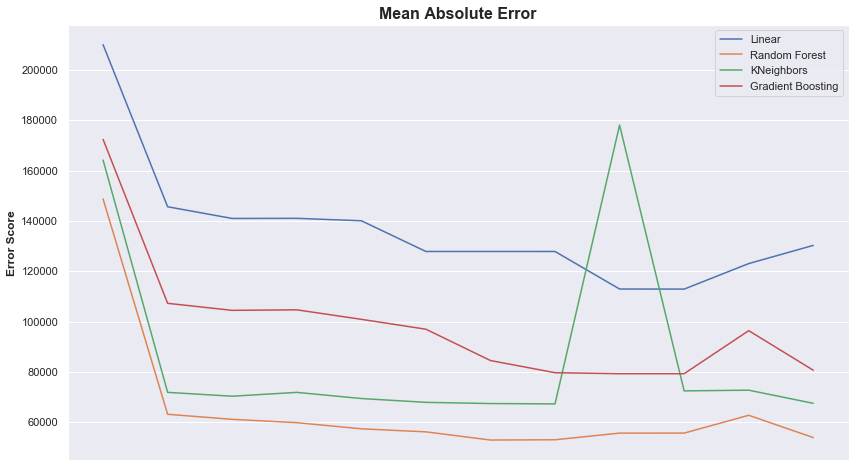

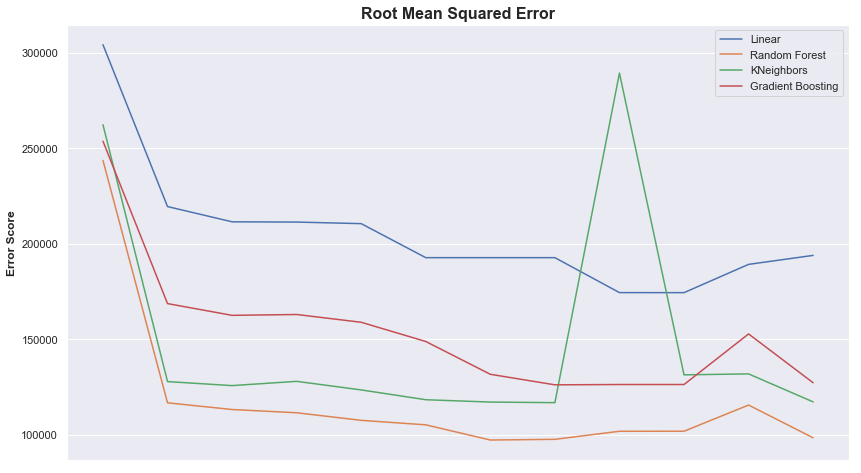

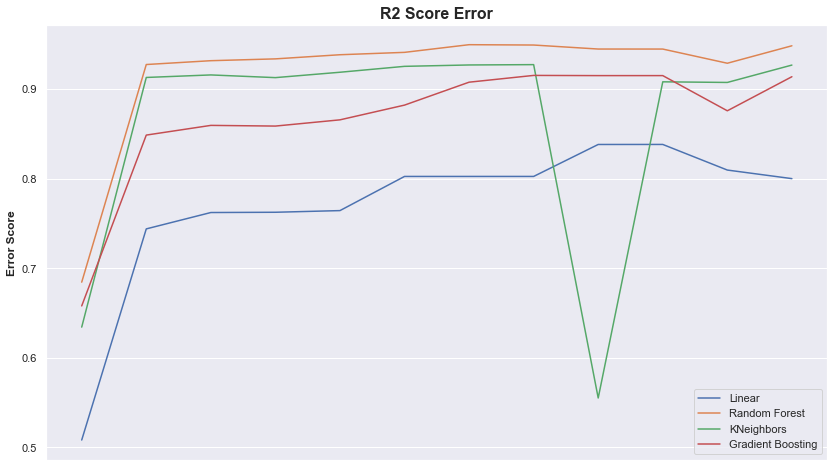

In [136]:
## Plot the progression of the errors

error_dfs = [mae_df, rmse_df, r2_df]

for df in error_dfs:
    
    linear_errors = df.loc['Linear',:]
    rf_errors = df.loc['Random Forest',:]
    kn_errors = df.loc['KNeighbors',:]
    gb_errors = df.loc['Gradient Boosting',:]
    
    plt.figure(figsize=(14, 8))
    plt.plot(linear_errors, label='Linear')
    plt.plot(rf_errors, label='Random Forest')
    plt.plot(kn_errors, label='KNeighbors')
    plt.plot(gb_errors, label='Gradient Boosting')
    
    plt.ylabel('Error Score', fontweight='bold')
    plt.title('{}'.format(df.name), fontweight='bold', fontsize=16)
    
    plt.xticks([])
    plt.legend(loc='best')
    
    plt.show()

Outside of the outlier point for the KNeighbors regression, we see a steady improvement as we add different variables to our model. In total, from start to finish, we see a dramatic overall improvement across all error metrics and model types, showing the importance of adding the right features as well as selecting the right final features.

In [137]:
## Prepare the data for the plot of all MAE values

tuned_maes = pd.Series([tuned_rf_mae, tuned_knr_mae, tuned_gb_mae])

all_maes = mae_df.copy()
all_maes.drop('Linear', axis=0, inplace=True)
all_maes['MAE_tuned'] = tuned_maes.values

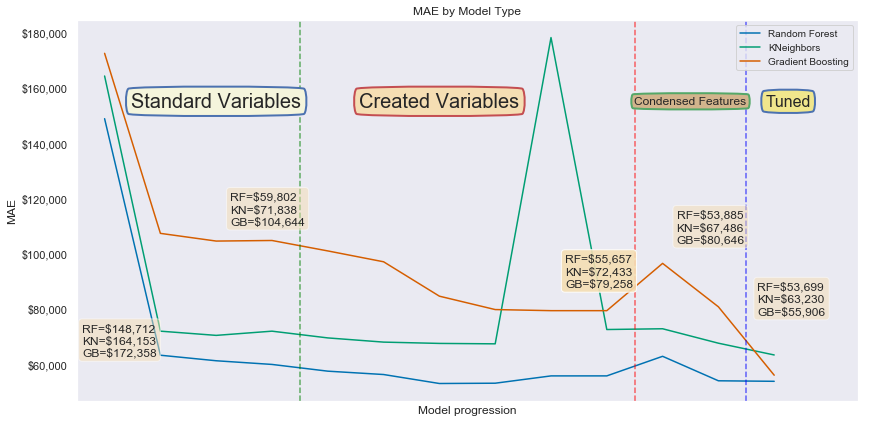

In [138]:
import matplotlib.style as style
style.use('seaborn-colorblind')
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(all_maes.loc['Random Forest',:], label='Random Forest')
ax.plot(all_maes.loc['KNeighbors',:], label='KNeighbors')
ax.plot(all_maes.loc['Gradient Boosting',:], label='Gradient Boosting')

ax.set_xticks([])
ax.set_xlim([-0.5, 13.5])
ax.tick_params(axis='x', labelrotation=90)
ax.legend(loc='upper right', prop={'size':10})

textstr = '\n'.join((
    'RF=\${0:,}'.format(int(all_maes.loc['Random Forest', 'MAE_continuous_variables'])),
    'KN=\${0:,}'.format(int(all_maes.loc['KNeighbors', 'MAE_continuous_variables'])),
    'GB=\${0:,}'.format(int(all_maes.loc['Gradient Boosting', 'MAE_continuous_variables']))))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(-0.4, 75000, textstr, fontsize=12, verticalalignment='top', bbox=props)

ax.axvline(3.5, color='green', alpha=0.6, linestyle='dashed')

bbox_props = dict(boxstyle="round4,pad=0.3", fc="beige", ec="b", lw=2)
t = ax.text(2, 155000, "Standard Variables", ha="center", va="center", rotation=0,
            size=20, bbox=bbox_props)

textstr = '\n'.join((
    'RF=\${0:,}'.format(int(all_maes.loc['Random Forest', 'MAE_cont_neigh_view_orient'])),
    'KN=\${0:,}'.format(int(all_maes.loc['KNeighbors', 'MAE_cont_neigh_view_orient'])),
    'GB=\${0:,}'.format(int(all_maes.loc['Gradient Boosting', 'MAE_cont_neigh_view_orient']))))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(2.25, 122500, textstr, fontsize=12, verticalalignment='top', bbox=props)

ax.axvline(9.5, color='red', alpha=0.6, linestyle='dashed')
bbox_props = dict(boxstyle="round4,pad=0.3", fc="wheat", ec="r", lw=2)
t = ax.text(6, 155000, "Created Variables", ha="center", va="center", rotation=0,
            size=20, bbox=bbox_props)

textstr = '\n'.join((
    'RF=\${0:,}'.format(int(all_maes.loc['Random Forest', 'MAE_with_poly_s'])),
    'KN=\${0:,}'.format(int(all_maes.loc['KNeighbors', 'MAE_with_poly_s'])),
    'GB=\${0:,}'.format(int(all_maes.loc['Gradient Boosting', 'MAE_with_poly_s']))))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)

ax.text(8.25, 100000, textstr, fontsize=12, verticalalignment='top', bbox=props)

bbox_props = dict(boxstyle="round4,pad=0.3", fc="tan", ec="g", lw=2)

t = ax.text(10.5, 155000, "Condensed Features", ha="center", va="center", rotation=0,
            size=12, bbox=bbox_props)

textstr = '\n'.join((
    'RF=\${0:,}'.format(int(all_maes.loc['Random Forest', 'MAE_best_k_consolidated_models'])),
    'KN=\${0:,}'.format(int(all_maes.loc['KNeighbors', 'MAE_best_k_consolidated_models'])),
    'GB=\${0:,}'.format(int(all_maes.loc['Gradient Boosting', 'MAE_best_k_consolidated_models']))))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(10.25, 116000, textstr, fontsize=12, verticalalignment='top', bbox=props)

ax.axvline(11.5, color='blue', alpha=0.6, linestyle='dashed')
bbox_props = dict(boxstyle="round4,pad=0.3", fc="khaki", ec="b", lw=2)
t = ax.text(12.25, 155000, "Tuned", ha="center", va="center", rotation=0,
            size=16, bbox=bbox_props)

textstr = '\n'.join((
    'RF=\${0:,}'.format(int(all_maes.loc['Random Forest', 'MAE_tuned'])),
    'KN=\${0:,}'.format(int(all_maes.loc['KNeighbors', 'MAE_tuned'])),
    'GB=\${0:,}'.format(int(all_maes.loc['Gradient Boosting', 'MAE_tuned']))))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(11.7, 90000, textstr, fontsize=12, verticalalignment='top', bbox=props)

ax.grid(False)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.title('MAE by Model Type')
plt.ylabel('MAE')
plt.xlabel('Model progression')

plt.show()

In [139]:
# Analysis of final errors by model (size=size of error, hue=neighborhood, scatter = predicted vs acutal)

errors = pd.DataFrame()

errors['actual_test'] = tst_y
errors['rfr_pred'] = rfr_grid.predict(tst_x)
errors['gb_pred'] = gbr_grid.predict(tst_x)
errors['kn_pred'] = knr_grid.predict(tst_x)

In [140]:
## Add error values to the data frame and the Neighborhood variable

errors['rfr_abs_error'] = np.abs(errors['actual_test'] - errors['rfr_pred'])
errors['gb_abs_error'] = np.abs(errors['actual_test'] - errors['gb_pred'])
errors['kn_abs_error'] = np.abs(errors['actual_test'] - errors['kn_pred'])

errors.loc[:,[i for i in errors.columns if i!='neighborhood']] = errors.loc[:,\
            [i for i in errors.columns if i!='neighborhood']].astype(int)

errors['neighborhood'] = predict_df[predict_df.index.isin(tst_y.index)]['Neighborhood']

In [141]:
## Define a function to plot the errors for each model type

def plot_errors(model_errors, model_error_size, model_type, df=errors):
    
    fig = plt.figure(figsize=(14, 10))
    ax = plt.subplot(111)
    style.use('bmh')

    ax = sns.scatterplot(x=model_errors, y='actual_test', data=df, hue='neighborhood', size=model_error_size, sizes=(1, 250))
    ax.set_title('Error size for %s predictions' %model_type, fontweight='bold')
    ax.set_ylabel('Actual value', fontweight='bold')
    ax.set_xlabel('Predicted Value, %s' %model_type, fontweight='bold')

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    ax.xaxis.set_major_formatter(tick)

    plt.show()

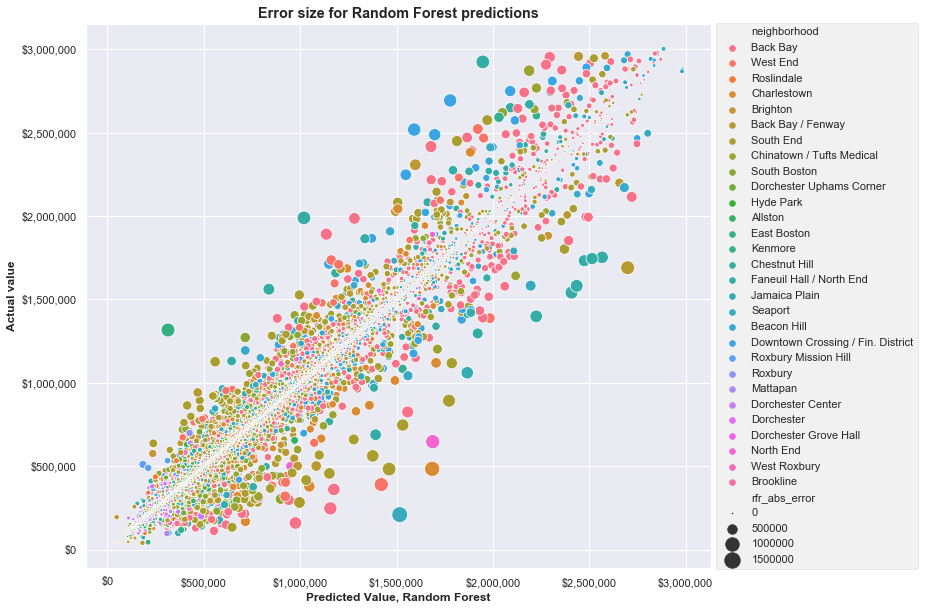

In [142]:
plot_errors('rfr_pred', 'rfr_abs_error', 'Random Forest')

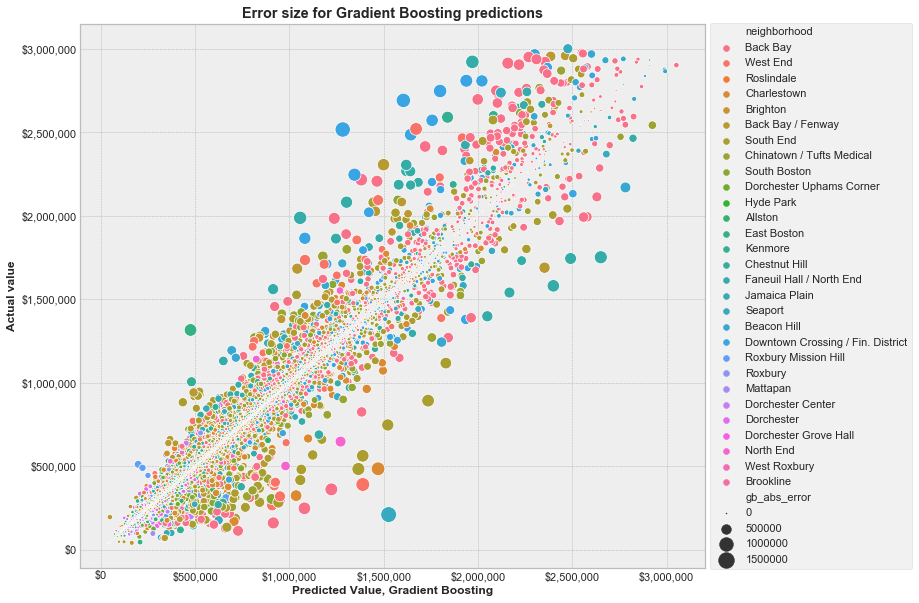

In [143]:
plot_errors('gb_pred', 'gb_abs_error', 'Gradient Boosting')

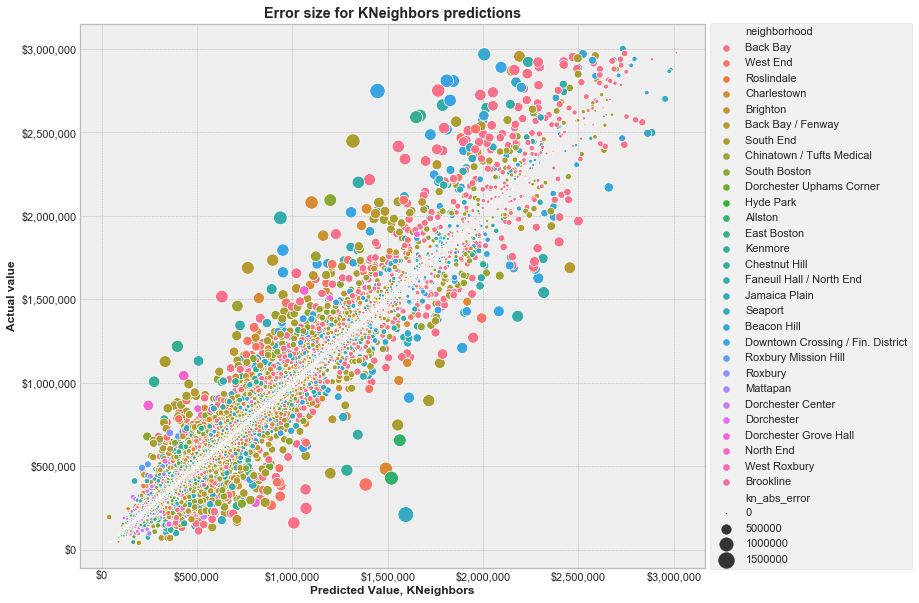

In [144]:
plot_errors('kn_pred', 'kn_abs_error', 'KNeighbors')

In [145]:
perc_error_gb = round(errors.gb_abs_error.sum() / errors.actual_test.sum(), 2)
perc_error_rfr = round(errors.rfr_abs_error.sum() / errors.actual_test.sum(), 2)
perc_error_kn = round(errors.kn_abs_error.sum() / errors.actual_test.sum(), 2)

print(perc_error_gb)
print(perc_error_rfr)
print(perc_error_kn)

0.1
0.09
0.11


In [146]:
def perc_change(value_initial, value_final, error_type='MAE'):
    
    change = ((value_final - value_initial) / value_initial) * 100
    
    if change > 0:
        
        return 'The {0} has increased by {1:.2f}% from {2:.1f} to {3:.1f}'.format(\
                error_type, change, value_initial, value_final)
    
    if change <= 0:
        
        return 'The {0} has decreased by {1:.1f}% from {2:.1f} to {3:.1f}'.format(\
                error_type, change * -1, value_initial, value_final)


In [147]:
baseline_to_best_tuned = perc_change(mean_mae, np.min(all_maes['MAE_tuned']))

baseline_to_best_tuned

'The MAE has decreased by 81.5% from 290380.3 to 53699.6'

In [148]:
first_to_last = perc_change(np.min(all_maes['MAE_continuous_variables']), np.min(all_maes['MAE_tuned']))

first_to_last

'The MAE has decreased by 63.9% from 148712.1 to 53699.6'

In [149]:
continuous_to_neighborhood = perc_change(np.min(all_maes['MAE_continuous_variables']), 
                                         np.min(all_maes['MAE_continuous_plus_neighborhood']))

continuous_to_neighborhood

'The MAE has decreased by 57.5% from 148712.1 to 63135.7'

# Conclusion

And that concludes the notebook! It took much trial and error and a lot of Googling to understand the concepts, carry out the coding, and interpret the results. The model isn't perfect - it's still off by, on average, about 10% even with our carefully selected and tuned models - but I was able to learn new concepts, dive into an interesting topic for me, and get more practice with real-world data sets. I hope you've enjoyed going through, and once again, welcome any thoughts that you may have at jordan@jordanbean.com.